# Исследование объявлений о продаже квартир

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Оглавление
**[1. Открытие файла с данными и изучение общей информации](#чтение_файла)**

**[2. Предобработка данных](#предобработка_данных)**
   * [2.1 Обработка пропущенных значений](#предобработка_данных__обработка_пропущенных_значений)
        * [2.1.1 Столбец floors_total](#предобработка_данных__обработка_пропущенных_значений__столбец_floors_total)
        * [2.1.2 Столбец ceiling_height](#предобработка_данных__обработка_пропущенных_значений__столбец_ceiling_height)
        * [2.1.3 Столбец living_area](#предобработка_данных__обработка_пропущенных_значений__столбец_living_area)
        * [2.1.4 Столбец kitchen_area](#предобработка_данных__обработка_пропущенных_значений__столбец_kitchen_area)
        * [2.1.5 Столбец is_apartment](#предобработка_данных__обработка_пропущенных_значений__столбец_is_apartment)
        * [2.1.6 Столбец balcony](#предобработка_данных__обработка_пропущенных_значений__столбец_balcony)
        * [2.1.7 Столбцы parks_around3000 и parks_nearest](#предобработка_данных__обработка_пропущенных_значений__столбцы_parks_around3000&parks_nearest)
        * [2.1.8 Столбцы ponds_around3000 и ponds_nearest](#предобработка_данных__обработка_пропущенных_значений__столбцы_ponds_around3000&ponds_nearest)
        * [2.1.9 Столбцы airports_nearest и cityCenters_nearest](#предобработка_данных__обработка_пропущенных_значений__столбцы_airports_nearest&cityCenters_nearest)
        * [2.1.10 Столбец days_exposition](#предобработка_данных__обработка_пропущенных_значений__столбец_days_exposition)
        * [2.1.11 Столбец locality_name](#предобработка_данных__обработка_пропущенных_значений__столбец_locality_name)
   * [2.2 Обработка дубликатов](#предобработка_данных__обработка_дубликатов)
   * [2.3 Замена типа данных](#предобработка_данных__замена_типа_данных)
   
**[3. Добавление данных в таблицу](#добавление_данных_в_таблицу)**
   * [3.1 Расчет квадратного метра](#добавление_данных_в_таблицу__расчет_квадратного_метра)
   * [3.2 День недели, месяц и год публикации объявления](#добавление_данных_в_таблицу__день_недели_месяц_и_год_публикации_объявления)
   * [3.3 Этаж квартиры (первый, последний, другой)](#добавление_данных_в_таблицу__этаж_квартиры)
   * [3.4 Соотношение жилой площади к общей площади](#добавление_данных_в_таблицу__соотношение_жилой_площади_к_общей_площади)
   * [3.5 Соотношение площади кухни к общей площади](#добавление_данных_в_таблицу__соотношение_площади_кухни_к_общей_площади)
   
**[4. Проведение исследовательского анализа данных](#проведение_исследовательского_анализа_данных)**
   * [4.1 Изучение следующих параметров: площадь, цена, число комнат, высота потолков](#проведение_исследовательского_анализа_данных__изучение_следующих_параметров_площадь_цена_число_комнат_высота_потолков)
   * [4.2 Изучение времени продажи квартиры](#проведение_исследовательского_анализа_данных__изучение_времени_продажи_квартиры)
   * [4.3 Фильтрация данных](#проведение_исследовательского_анализа_данных__фильтрация_данных)
   * [4.4 Факторы, влияющие на  стоимость квартиры](#проведение_исследовательского_анализа_данных__факторы_влияющие_на_стоимость_квартиры)
   * [4.5 Анализ предложений квартир в Сантк-Петербурге](#проведение_исследовательского_анализа_данных__анализ_предложений_квартир_в_Санкт_Петербурге)
   * [4.6 Анализ квартир в центре Санкт-Петербурга](#проведение_исследовательского_анализа_данных__анализ_квартир_в_центре_Санкт_Петербурге)
   
**[5. Общий вывод](#общий_вывод)**

## 1. Открытие файла с данными и изучение общей информации. <a id="чтение_файла"></a>

Откроем файл с данными методом `read_csv()`, выведем первые 20 строчек методом `head()`, посмотрим общую информацию о таблице методом `info()` и посмотрим статистическую информацию о численных столбцах методом `describe()`. Затем наметим дальнейший план о предобработке данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data = pd.read_csv();

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Таблица содержит 23699 строк и 22 столбца.

Первым бросается в галаза, что очень много пропусков в столбцах, а еще хуже, что пропуски в важных для нас столбцах, таких как ***ceiling_height, living_area, kitchen_area, cityCenters_nearest***.


### Вывод

Изучили общую информацию, содержащуюся в файле. 

Выделим основные проблемы, которые будем решать при предобработке данных:
1. Столбец ***total_area*** максимальное значение 900 кв.метров... Нереальное значение, скорее всего ошиблись при вводе площади и добавили лишний ноль;
1. Столбец ***rooms*** максимальное значение 19 комнат... Скорее всего ошиблись при вводе значения;
1. Столбец ***ceiling_height*** очень много пропущенных значений, так еще и максимальное значение 100 метров;
1. Столбец ***floors_total*** есть небольшое количество пропущенных значений;
1. Столбец ***living_area*** около 10% пропущенных значений... Возможно при подаче объявления была не известна жилая площадь;
1. Столбец ***kitchen_area*** около 10% пропущенных значений... Возможно при подаче объявления была не известна площадь кухни;
1. Столбец ***balcony*** около 50% пропущенных значений... Скорее всего у кого нет балкона оставляли этот пункт пустым;
1. Столбцы ***airports_nearest*** и ***cityCenters_nearest*** около 20% пропущенных значений... Скорее всего на картах не удалось найти адрес по которому находится квартира. И автоматическая система оставляла эти пункты пустымы;
1. Столбцы ***ponds_around3000, parks_around3000*** пропущенные значения надо заменить на 0;
1. Столбец ***days_exposition*** также есть пропущенные значения... Предположу, что забыли закрыть объявления о продаже, либо квартира все еще не продана;
1. Столбец ***is_apartment*** около 90% пропущенных знаечний... Предположу, что не все имеют представления, что значит апартаменты, поэтому столько пустых значений. Если у продавца апартаменты, то он явно это должен был указать;
1. Столбец ***first_day_exposition*** поменять тип данных на datetime;
1. Столбцы ***last_price, floors_total, balcony, days_exposition, parks_around3000, ponds_around3000*** поменять тип данных на int;
1. Столбец ***is_apartment*** тип данных поменять на bool

## 2. Предобработка данных<a id="предобработка_данных"></a>

## 2.1 Обработка пропущенных значений<a id="предобработка_данных__обработка_пропущенных_значений"></a>

### 2.1.1 Столбец ***floors_total***<a id="предобработка_данных__обработка_пропущенных_значений__столбец_floors_total"></a>

Проверим количество пропущенных значений в столбце ***floors_total***.

In [5]:
print('Количество пропущенных значений в столбце floors_total:', data['floors_total'].isnull().sum())

Количество пропущенных значений в столбце floors_total: 86


Так как пропущенных значений немного и восстановить значения количество этажей в доме не получится, то удалим строчки с пустыми значениями.

In [6]:
data = data.dropna(subset = ['floors_total']).reset_index(drop=True)

Проверим, что пропущенных значений не осталось.

In [7]:
print('Количество пропущенных значений в столбце floors_total:', data['floors_total'].isnull().sum())

Количество пропущенных значений в столбце floors_total: 0


### 2.1.2 Столбец  *ceiling_height*<a id="предобработка_данных__обработка_пропущенных_значений__столбец_ceiling_height"></a>

Проверим количество пропущенных значений в столбце ***ceiling_height***

In [8]:
print('Количество пропущенных значений в столбце ceiling_height:', data['ceiling_height'].isnull().sum())

Количество пропущенных значений в столбце ceiling_height: 9118


Заменим в столбце ***ceiling_height*** пропущенные значения на значение медианы высоты потолков в зависимости от количнтва этажей в доме.

In [9]:
data['ceiling_height'] = data.groupby('floors_total')['ceiling_height'].apply(lambda x: x.replace(np.nan, x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Проверим количество пропусков после замены.

In [10]:
print('Количество пропущенных значений в столбце ceiling_height:', data['ceiling_height'].isnull().sum())

Количество пропущенных значений в столбце ceiling_height: 1


Посмотрим это объявление.

In [11]:
data[data['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11525,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Скорее всего, что объявление, в котором дом 33 этажный всего одно и поэтому не удалось заменить значение высоты потолков в зависимотси от количества этажей в здании. Проверим эту гипотезу.

In [12]:
data[data['floors_total'] == 33]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11525,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Гипотеза подтвердилась. Так как такое объявление всего одно, то удалим строчки с пропусками.

In [13]:
data = data.dropna(subset = ['ceiling_height']).reset_index(drop=True)

Проверим, что пропущенных значений не осталось.

In [14]:
print('Количество пропущенных значений в столбце ceiling_height:', data['ceiling_height'].isnull().sum())

Количество пропущенных значений в столбце ceiling_height: 0


### 2.1.3 Столбец ***living_area***<a id="предобработка_данных__обработка_пропущенных_значений__столбец_living_area"></a>

Проверим количество пропущенных значений в столбце ***living_area***.

In [15]:
print('Количество пропущенных значений в столбце living_area:', data['living_area'].isnull().sum())

Количество пропущенных значений в столбце living_area: 1870


Жилая площадь зависит от количества комнат. Предлагаю заменить пропущенные значения на значение медианы жилой площади в зависимости от количества комнат. Но для начала вычислим коэффициент корреляции Пирсона и посомтрим с какими столбцами корреляция самая большая. 

In [16]:
data.corr()['living_area']

total_images           0.105391
last_price             0.566394
total_area             0.939770
rooms                  0.846001
ceiling_height         0.082309
floors_total          -0.169491
living_area            1.000000
floor                 -0.097314
studio                -0.056298
open_plan             -0.033752
kitchen_area           0.428737
balcony                0.019953
airports_nearest      -0.057540
cityCenters_nearest   -0.231014
parks_around3000       0.185246
parks_nearest         -0.050856
ponds_around3000       0.149166
ponds_nearest         -0.081993
days_exposition        0.142525
Name: living_area, dtype: float64

Из результата видно, что значение жилой площади отлично коррелирует с значением общей площади и числом комнат. Предлагаю все же использовать значение числа комнат, так как не придется делить количество комнат на категории.

Заменим в столбце ***living_area*** пропущенные значения на значение медианы жилой площади в зависимости от количества комнат в квартире.

In [17]:
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda x: x.replace(np.nan, x.median()))

Проверим количество пропусков после замены.

In [18]:
print('Количество пропущенных значений в столбце living_area:', data['living_area'].isnull().sum())

Количество пропущенных значений в столбце living_area: 0


### 2.1.4 Столбец ***kitchen_area***<a id="предобработка_данных__обработка_пропущенных_значений__столбец_kitchen_area"></a>

Проверим количество пропущенных значений в столбце ***kitchen_area***.

In [19]:
print('Количество пропущенных значений в столбце kitchen_area:', data['kitchen_area'].isnull().sum())

Количество пропущенных значений в столбце kitchen_area: 2231


Посчитаем площадь квартиры за исключением жилой площади.

In [20]:
data['other_area'] = data['total_area'] - data['living_area']

Площадь кухни должна зависеть от площади оставшейся части квартиры, которую мы вычислили выше. Предлагаю заменить пропущенные значения на значение медианы площади кухни в зависимости от "другой" площади. Но для начала вычислим коэффициент корреляции Пирсона и посомтрим с какими столбцами корреляция самая большая. 

In [21]:
data.corr()['kitchen_area']

total_images           0.105796
last_price             0.520029
total_area             0.609436
rooms                  0.269626
ceiling_height         0.081980
floors_total           0.163717
living_area            0.423681
floor                  0.135140
studio                      NaN
open_plan                   NaN
kitchen_area           1.000000
balcony                0.100366
airports_nearest       0.008557
cityCenters_nearest   -0.190049
parks_around3000       0.088350
parks_nearest          0.029752
ponds_around3000       0.150386
ponds_nearest         -0.104317
days_exposition        0.100712
other_area             0.715359
Name: kitchen_area, dtype: float64

Как и предполагалось лучше всего площадь кухни коррелирует с "другой" площадью. 

Проведем категоризацию данных по столбцу ***other_area***.

In [22]:
data['group_other_area']  = pd.qcut(data['other_area'], 4, labels=['очень маленькая', 'маленькая', 'средняя', 'большая'])

Заменим в столбце ***kitchen_area*** пропущенные значения на значение медианы площади кухни в зависимости от "другой" площади квартиры.

In [23]:
data['kitchen_area'] = data.groupby('group_other_area')['kitchen_area'].apply(lambda x: x.replace(np.nan, x.median()))

Проверим количество пропусков после замены.

In [24]:
print('Количество пропущенных значений в столбце kitchen_area:', data['kitchen_area'].isnull().sum())

Количество пропущенных значений в столбце kitchen_area: 0


### 2.1.5 Столбец ***is_apartment***<a id="предобработка_данных__обработка_пропущенных_значений__столбец_is_apartment"></a>

Проверим количество пропущенных значений в столбце ***is_apartment***.

In [25]:
print('Количество пропущенных значений в столбце is_apartment:', data['is_apartment'].isnull().sum())

Количество пропущенных значений в столбце is_apartment: 20838


Проверим какие значения присутствуют в этом столбце.

In [26]:
data['is_apartment'].value_counts()

False    2724
True       50
Name: is_apartment, dtype: int64

Скорее всего не все знают, что такое аппартаменты, а кто это знает или у кого аппартаменты, то явно должны были это указать. Поэтому заменим пропущенные значения на False.

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверим количество пропусков после замены.

In [28]:
print('Количество пропущенных значений в столбце is_apartment:', data['is_apartment'].isnull().sum())

Количество пропущенных значений в столбце is_apartment: 0


### 2.1.6 Столбец ***balcony***<a id="предобработка_данных__обработка_пропущенных_значений__столбец_balcony"></a>

Проверим количество пропущенных значений в столбце ***balcony***.

In [29]:
print('Количество пропущенных значений в столбце balcony:', data['balcony'].isnull().sum())

Количество пропущенных значений в столбце balcony: 11480


Проверим какие значения присутствуют в этом столбце.

In [30]:
data['balcony'].value_counts()

1.0    4195
0.0    3712
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Скорее всего те, кто не указал количество балконов, то у того просто нет балконов. Поэтому заменим пропущенные значения в этом столбце на 0.

In [31]:
data['balcony'] = data['balcony'].fillna(0)

Проверим количество пропусков после замены.

In [32]:
print('Количество пропущенных значений в столбце balcony:', data['balcony'].isnull().sum())

Количество пропущенных значений в столбце balcony: 0


### 2.1.7 Столбцы ***parks_around3000*** и ***parks_nearest***<a id="предобработка_данных__обработка_пропущенных_значений__столбцы_parks_around3000&parks_nearest"></a>

Проверим количество пропущенных значений в столбце ***parks_around3000***.

In [33]:
print('Количество пропущенных значений в столбце parks_around3000:', data['parks_around3000'].isnull().sum())

Количество пропущенных значений в столбце parks_around3000: 5508


Проверим какие значения присутствуют в этом столбце.

In [34]:
data['parks_around3000'].value_counts()

0.0    10063
1.0     5657
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64

Проверим количество пропущенных значений в столбце ***parks_nearest***.

In [35]:
print('Количество пропущенных значений в столбце parks_nearest:', data['parks_nearest'].isnull().sum())

Количество пропущенных значений в столбце parks_nearest: 15567


Проверим все ли пропущенные значения в столбце parks_nearest также пропущены в столбце parks_around3000 или равны в нем 0.

In [36]:
len(data[(data['parks_nearest'].isnull()) & ( (data['parks_around3000'].isnull()) | (data['parks_around3000'] == 0) )])

15567

Гипотеза подтвердилась. Предлагаю пропущенные значения в столбце не заменять, так как непонятно, чем вызваны пропуски. Эти значения получены системой автоматически и возможно, что для отсутствующих значений система не распологает информацией о ближайщих парках.

### 2.1.8 Столбцы ***ponds_around3000*** и ***ponds_nearest***<a id="предобработка_данных__обработка_пропущенных_значений__столбцы_ponds_around3000&ponds_nearest"></a>

Проверим количество пропущенных значений в столбце ***ponds_around3000***.

In [37]:
print('Количество пропущенных значений в столбце ponds_around3000:', data['ponds_around3000'].isnull().sum())

Количество пропущенных значений в столбце ponds_around3000: 5508


Проверим какие значения присутствуют в этом столбце.

In [38]:
data['ponds_around3000'].value_counts()

0.0    9044
1.0    5677
2.0    1886
3.0    1497
Name: ponds_around3000, dtype: int64

Проверим количество пропущенных значений в столбце ***ponds_nearest***.

In [39]:
print('Количество пропущенных значений в столбце ponds_nearest:', data['ponds_nearest'].isnull().sum())

Количество пропущенных значений в столбце ponds_nearest: 14552


Проверим все ли пропущенные значения в столбце ponds_nearest также пропущены в столбце ponds_around3000 или равны в нем 0.

In [40]:
len(data[(data['ponds_nearest'].isnull()) & ( (data['ponds_around3000'].isnull()) | (data['ponds_around3000'] == 0) )])

14552

Гипотеза подтвердилась. Предлагаю пропущенные значения в столбце не заменять, так как непонятно, чем вызваны пропуски. Эти значения получены системой автоматически и возможно, что для отсутствующих значений система не распологает информацией о ближайщих водоемах.

### 2.1.9 Столбцы ***airports_nearest*** и ***cityCenters_nearest***<a id="предобработка_данных__обработка_пропущенных_значений__столбцы_airports_nearest&cityCenters_nearest"></a>

Проверим количество пропущенных значений в столбце ***airports_nearest***.

In [41]:
print('Количество пропущенных значений в столбце airports_nearest:', data['airports_nearest'].isnull().sum())

Количество пропущенных значений в столбце airports_nearest: 5532


Проверим количество пропущенных значений в столбце ***cityCenters_nearest***.

In [42]:
print('Количество пропущенных значений в столбце cityCenters_nearest:', data['cityCenters_nearest'].isnull().sum())

Количество пропущенных значений в столбце cityCenters_nearest: 5509


Почти одинаковое количество. Проверим все ли значения пропущенные в ***cityCenters_nearest***, также пропущены и в ***airports_nearest***.

In [43]:
len(data[(data['cityCenters_nearest'].isnull()) & (data['airports_nearest'].isnull())])

5508

Получается, что заменить пропуски из столбца ***cityCenters_nearest*** основываясь на данных из столбца ***airports_nearest*** не получится.

Попробуем востановить данные исходя из среденего знаечния удаленности от центра в зависимости от города. Для этого с помощью сводной таблицы определим общее количество объявлений о продаже квартиры и общее число не пропущенных значений отдаленности от центра в зависимости от города.

In [44]:
data_nearest = data.pivot_table(index = 'locality_name', values = ['cityCenters_nearest', 'total_images'], aggfunc = {'count'})
data_nearest.columns = ['not_empty_value', 'count']
data_nearest = data_nearest.sort_values(by = 'count', ascending = False)
data_nearest

,not_empty_value,count
locality_name,,
Санкт-Петербург,15590,15650
посёлок Мурино,0,520
посёлок Шушары,436,439
Всеволожск,0,398
Пушкин,368,369
...,...,...
поселок Каложицы,0,1
поселок Кирпичное,0,1
поселок Коммунары,0,1


Всего 364 населенных пункта. Сразу же бросается в глаза, что есть населенные пукнты, для которых полностью отсутствуют значения удаленности от центра. Проверим сколько таких населеных пунктов.

In [45]:
len(data_nearest[data_nearest['not_empty_value'] == 0])

338

338! населенный пункт из 364... Очень много... Выходит, что не получится восстановить данные в этом столбце. Вручную заполнять значения для 338 населенного пункта считаю неправильным подходом. Поэтому предлагаю оставить этот столбец как есть сейчас и посмотреть в дальнейшем, как скажутся такие данные на результатах исследования.

### 2.10 Столбец ***days_exposition***<a id="предобработка_данных__обработка_пропущенных_значений__столбец_days_exposition"></a>

Проверим количество пропущенных значений в столбце ***days_exposition***.

In [46]:
print('Количество пропущенных значений в столбце days_exposition:', data['days_exposition'].isnull().sum())

Количество пропущенных значений в столбце days_exposition: 3172


Восстановить пропущенные значения в этом столбце не получится. Причины пропусков для этого столбца может быть несколько: квартира еще не продана, забыли снять объявление или ошибка при автоматической выгрузке из системы.

### 2.1.11 Столбец ***locality_name***<a id="предобработка_данных__обработка_пропущенных_значений__столбец_locality_name"></a>

Проверим количество пропущенных значений в столбце ***locality_name***.

In [47]:
print('Количество пропущенных значений в столбце locality_name:', data['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 48


Так как пропущенных значений немного и восстановить название города не получится, то удалим строчки с пустыми значениями.

In [48]:
data = data.dropna(subset = ['locality_name']).reset_index(drop=True)

Проверим, что пропущенных значений не осталось.

In [49]:
print('Количество пропущенных значений в столбце locality_name:', data['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 0


## 2.2 Обработка дубликатов<a id="предобработка_данных__обработка_дубликатов"></a>

Проверим количество дубликатов в таблице.

In [50]:
print('Количество одинаковых строк:', data.duplicated().sum())

Количество одинаковых строк: 0


Дубликатов нет.

## 2.3 Замена типа данных<a id="предобработка_данных__замена_типа_данных"></a>

Посмотрим еще раз какие типы данных в столбцах.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 24 columns):
total_images            23564 non-null int64
last_price              23564 non-null float64
total_area              23564 non-null float64
first_day_exposition    23564 non-null object
rooms                   23564 non-null int64
ceiling_height          23564 non-null float64
floors_total            23564 non-null float64
living_area             23564 non-null float64
floor                   23564 non-null int64
is_apartment            23564 non-null bool
studio                  23564 non-null bool
open_plan               23564 non-null bool
kitchen_area            23564 non-null float64
balcony                 23564 non-null float64
locality_name           23564 non-null object
airports_nearest        18040 non-null float64
cityCenters_nearest     18063 non-null float64
parks_around3000        18064 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

In [52]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,other_area,group_other_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,57.0,большая
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,21.8,маленькая
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,21.7,маленькая
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,114.0,большая
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,68.0,большая


Предлагаю для столбцов ***last_price, floors_total, balcony, other_area*** заменить тип данных на int, так как значения в этих столбцах должны быть целчисленными. Для этого используем метод `astype()`.

In [53]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['other_area'] = data['other_area'].astype(int)

Столбец ***first_day_exposition*** приведем к типу datetime, используя метод `to_datetime()`.

In [54]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

### Вывод

Проверим результат работы после предобработки данных.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 24 columns):
total_images            23564 non-null int64
last_price              23564 non-null int64
total_area              23564 non-null float64
first_day_exposition    23564 non-null datetime64[ns]
rooms                   23564 non-null int64
ceiling_height          23564 non-null float64
floors_total            23564 non-null int64
living_area             23564 non-null float64
floor                   23564 non-null int64
is_apartment            23564 non-null bool
studio                  23564 non-null bool
open_plan               23564 non-null bool
kitchen_area            23564 non-null float64
balcony                 23564 non-null int64
locality_name           23564 non-null object
airports_nearest        18040 non-null float64
cityCenters_nearest     18063 non-null float64
parks_around3000        18064 non-null float64
parks_nearest           8030 non-null float64
ponds_around30

Удалось избавиться от многих пропусков в столбцах, при этом потеряв только около 1% данных. На данный момент не удалось избавиться от пропусков в важных для исследования столбцах ***airports_nearest***, ***cityCenters_nearest*** и ***days_exposition***, но попробуем провести исследования с пропущенными данными и посомтрим на результат. Дубликатов в данных нет. Также заменили тип данных в столбцах ***last_price, floors_total, balcony, other_area*** на int, а в столбце ***first_day_exposition*** на datetime.

## 3. Добавление данных в таблицу<a id="добавление_данных_в_таблицу"></a>

### 3.1 Расчет квадратного метра<a id="добавление_данных_в_таблицу__расчет_квадратного_метра"></a>

Рассчитаем и добавим в таблицу цену за квадратный метр.

In [56]:
data['price_per_m2'] = data['last_price'] / data['total_area']

### 3.2 День недели, месяц и год публикации объявления<a id="добавление_данных_в_таблицу__день_недели_месяц_и_год_публикации_объявления"></a>

Добавим в таблицу день недели подачи объявления.

In [57]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Напишем функцию, которая меняет номер дня недели на название дня и применим ее к нашей таблице.

In [58]:
def weekday_name(row):
    if row == 0:
        return 'Понедельник'
    elif row == 1:
        return 'Вторник'
    elif row == 2:
        return 'Среда'    
    elif row == 3:
        return 'Четверг'
    elif row == 4:
        return 'Пятница'
    elif row == 5:
        return 'Суббота'
    else:
        return 'Воскресенье'    

data['weekday_exposition'] = data['weekday_exposition'].apply(weekday_name)

Добавим в таблицу месяц подачи объявления.

In [59]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим в таблицу год подачи объявления.

In [60]:
data['year_exposition'] = data['first_day_exposition'].dt.year

### 3.3 Этаж квартиры (первый, последний, другой)<a id="добавление_данных_в_таблицу__этаж_квартиры"></a>

Напишем функцию, которая будет определять расположение квартиры в доме.

In [61]:
def floor_group(row):
    floor = row['floor'] 
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'

Применем функцию к нашей таблице.

In [62]:
data['floor_group'] = data.apply(floor_group, axis = 1)

### 3.4 Соотношение жилой площади к общей площади<a id="добавление_данных_в_таблицу__соотношение_жилой_площади_к_общей_площади"></a>

Найдем соотношение жилой площади к общей и добавим данные в таблицу.

In [63]:
data['living_area_ratio'] = data['living_area'] / data['total_area']

### 3.5 Соотношение площади кухни к общей площади<a id="добавление_данных_в_таблицу__соотношение_площади_кухни_к_общей_площади"></a>

Найдем соотношение площади кухни к общей площади и добавим данные в таблицу.

In [64]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

### Вывод

Рассчитали и добавили следующие данные в таблицу:
  * цену за квадратный метр;
  * день, месяц, год, подачи объявления;
  * категоризацю для этажа (разбили данные на первый, последний или другой);
  * соотношение жилой площади к общей;
  * соотношение площади кухни к жилой.

Проверим. что нет пропущенных значений в добавленных столбцах и выведем первые 10 строк таблицы для визуального контроля данных.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 31 columns):
total_images            23564 non-null int64
last_price              23564 non-null int64
total_area              23564 non-null float64
first_day_exposition    23564 non-null datetime64[ns]
rooms                   23564 non-null int64
ceiling_height          23564 non-null float64
floors_total            23564 non-null int64
living_area             23564 non-null float64
floor                   23564 non-null int64
is_apartment            23564 non-null bool
studio                  23564 non-null bool
open_plan               23564 non-null bool
kitchen_area            23564 non-null float64
balcony                 23564 non-null int64
locality_name           23564 non-null object
airports_nearest        18040 non-null float64
cityCenters_nearest     18063 non-null float64
parks_around3000        18064 non-null float64
parks_nearest           8030 non-null float64
ponds_around30

In [66]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,other_area,group_other_area,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,57,большая,120370.370370,Четверг,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,81.0,21,маленькая,82920.792079,Вторник,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,558.0,21,маленькая,92785.714286,Четверг,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.60,14,45.00,9,False,...,424.0,114,большая,408176.100629,Пятница,7,2015,Другой,0.283019,0.088050
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.0,68,большая,100000.000000,Вторник,6,2018,Другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,55.0,15,очень маленькая,95065.789474,Понедельник,9,2018,Другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,155.0,26,средняя,99195.710456,Четверг,11,2017,Другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.75,24,30.50,22,False,...,NaN,41,большая,110544.692737,Четверг,4,2019,Другой,0.425978,0.263966
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,189.0,17,маленькая,87454.764777,Среда,5,2018,Другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.0,17,маленькая,88524.590164,Воскресенье,2,2017,Другой,0.714754,0.106557


Пропущенных значений нет. Добавленные столбцы выглядят правильно.

## 4. Проведение исследовательского анализа данных.<a id="проведение_исследовательского_анализа_данных"></a>

### 4.1 Изучение следующих параметров: площадь, цена, число комнат, высота потолков.<a id="проведение_исследовательского_анализа_данных__изучение_следующих_параметров_площадь_цена_число_комнат_высота_потолков"></a>

#### Cтолбец ***total_area***.

Посмотрим статистические значения для столбца ***total_area***.

In [67]:
total_area_describe = data['total_area'].describe()
total_area_describe

count    23564.000000
mean        60.321098
std         35.656831
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Среднее значение, применрно, на 15% больше, чем значение медианы. Это объясняется выбросами в этом столбце. Максимальное значение по этому столбцу 900, что достаточно много. Построим диаграмму размаха.

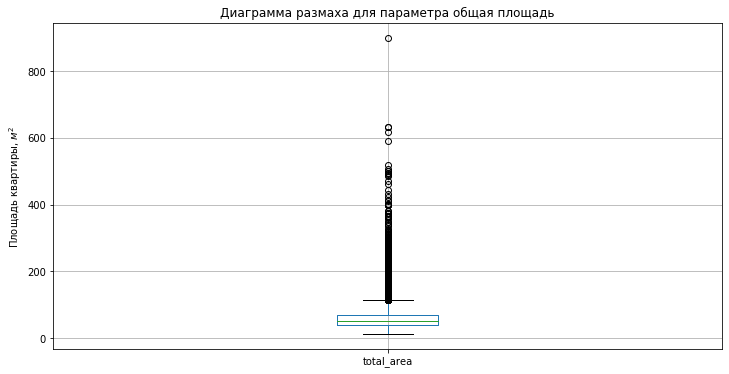

In [68]:
data[['total_area']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра общая площадь')
plt.ylabel(r'Площадь квартиры, $м^2$')
plt.show()

Посчитаем количество выбросов в столбце ***total_area***. Выбросами будут считаться все значения, которые больше, чем Q3 + 1.5IQR и мньше, чем Q1 - 1.5IQR. Напишем для этого функцию.

In [69]:
def outliers(data, columns):
    columns_describe = data[columns].describe()
    max_value = (columns_describe[6] + 
                           1.5 * (columns_describe[6] - columns_describe[4]))
    min_value = (columns_describe[4] - 
                           1.5 * (columns_describe[6] - columns_describe[4]))
    if max_value > data[columns].max():
        max_value = data[columns].max()
    if min_value < data[columns].min():
        min_value = data[columns].min()
    return min_value, max_value

In [70]:
total_area_IQR_min, total_area_IQR_max = outliers(data, 'total_area')

In [71]:
print('Выбросами считаются значения, которые больше, чем {:} и меньше, чем {:}'.format(total_area_IQR_max, total_area_IQR_min))

Выбросами считаются значения, которые больше, чем 114.25 и меньше, чем 12.0


In [72]:
print('Количество выбросов в столбце total_area:', len(data[(data['total_area'] > total_area_IQR_max) |
                                                           (data['total_area'] < total_area_IQR_min)]))

Количество выбросов в столбце total_area: 1239


Построим гистограмму для столбца ***total_area***.

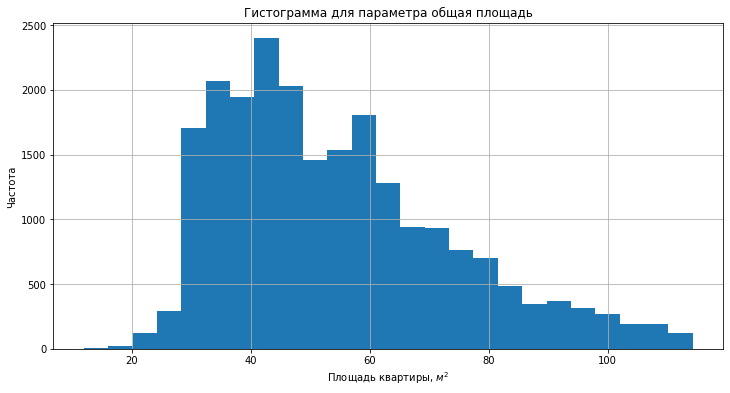

In [73]:
data['total_area'].hist(bins=25, range = (total_area_IQR_min, total_area_IQR_max), figsize = (12,6))
plt.title('Гистограмма для параметра общая площадь')
plt.xlabel(r'Площадь квартиры, $м^2$')
plt.ylabel('Частота')
plt.show()

Гистограмма похожа на Пуассановсое распределение с пиком в районе 45 и плавным дальнешем уменьшением.

#### Cтолбец ***last_price***.

Посмотрим статистические значения для столбца ***last_price***.

In [74]:
last_price_describe = data['last_price'].describe()
last_price_describe

count    2.356400e+04
mean     6.539916e+06
std      1.091114e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Среднее значение на 30% больше, чем значение медианы. Это объясняется большим количеством выбросов в этом столбце. Максимальное значение по этому столбцу 763 млн, что очень много. Построим диаграмму размаха.

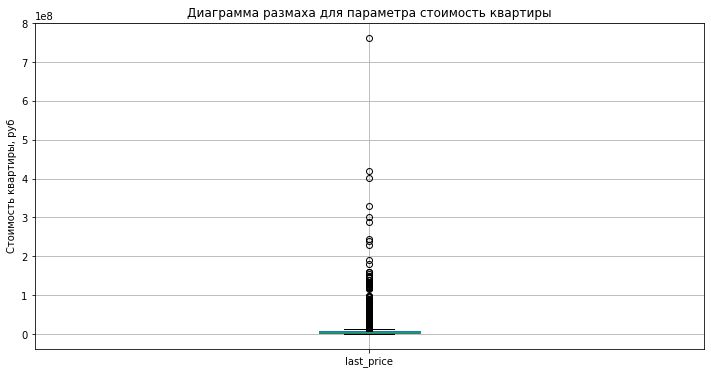

In [75]:
data[['last_price']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра стоимость квартиры')
plt.ylabel('Стоимость квартиры, руб')
plt.show()

Посчитаем количество выбросов в столбце ***last_price***. Выбросами будут считаться все значения, которые больше, чем Q3 + 1.5IQR и мньше, чем Q1 - 1.5IQR.

In [76]:
last_price_IQR_min, last_price_IQR_max = outliers(data, 'last_price')

In [77]:
print('Выбросами считаются значения, которые больше, чем {:} и меньше, чем {:}'.format(last_price_IQR_max, last_price_IQR_min))

Выбросами считаются значения, которые больше, чем 11875000.0 и меньше, чем 12190


In [78]:
print('Количество выбросов в столбце last_price:', len(data[(data['last_price'] > last_price_IQR_max) |
                                                           (data['last_price'] < last_price_IQR_min)]))

Количество выбросов в столбце last_price: 2046


Построим гистограмму для столбца ***last_price***.

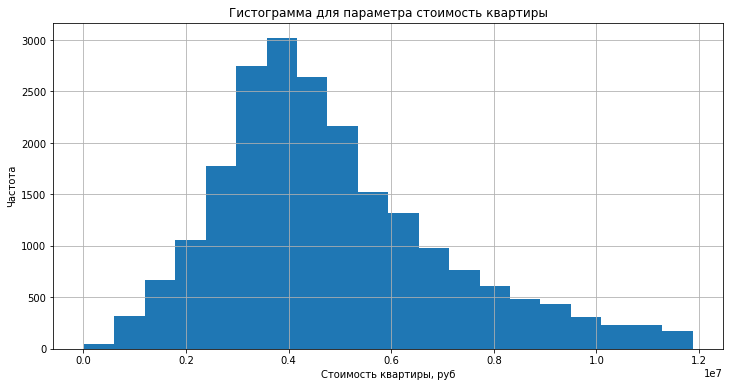

In [79]:
data['last_price'].hist(bins=20, range = (last_price_IQR_min, last_price_IQR_max), figsize = (12,6))
plt.title('Гистограмма для параметра стоимость квартиры')
plt.xlabel('Стоимость квартиры, руб')
plt.ylabel('Частота')
plt.show()

Гистограмма похожа на нормальное распределение с пиком в районе 4 млн.

#### Cтолбец ***rooms***.

Посмотрим статистические значения для столбца ***rooms***.

In [80]:
rooms_describe = data['rooms'].describe()
rooms_describe

count    23564.000000
mean         2.070616
std          1.078596
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Среднее занчение и медиана очень похожи. Это объясняется тем, что выросов в данном столбце практичсеки нет. Максимальное значение по этому столбцу 19, что очень много. Построим диаграмму размаха.

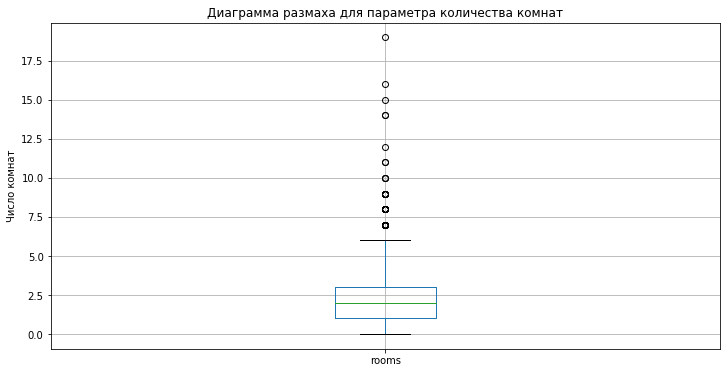

In [81]:
data[['rooms']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра количества комнат')
plt.ylabel('Число комнат')
plt.show()

Посчитаем количество выбросов в столбце ***rooms***. Выбросами будут считаться все значения, которые больше, чем Q3 + 1.5IQR и мньше, чем Q1 - 1.5IQR.

In [82]:
rooms_IQR_min, rooms_IQR_max = outliers(data, 'rooms')

In [83]:
print('Выбросами считаются значения, которые больше, чем {:} и меньше, чем {:}'.format(rooms_IQR_max, rooms_IQR_min))

Выбросами считаются значения, которые больше, чем 6.0 и меньше, чем 0


In [84]:
print('Количество выбросов в столбце rooms:', len(data[(data['rooms'] > rooms_IQR_max) |
                                                           (data['rooms'] < rooms_IQR_min)]))

Количество выбросов в столбце rooms: 90


Построим гистограмму для столбца ***rooms***.

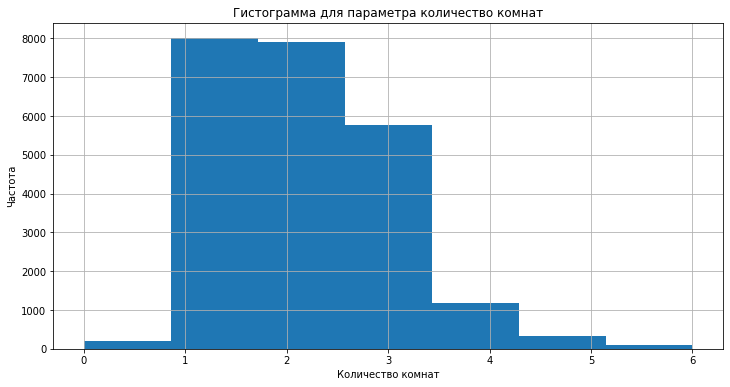

In [85]:
data['rooms'].hist(bins=7, range = (rooms_IQR_min, rooms_IQR_max), figsize = (12,6))
plt.title('Гистограмма для параметра количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Гистограмма похожа на Пуассановсое распределение с пиком в районе 1-х и 2-х комнатных квартир и дальнешем уменьшением.

#### Cтолбец ***ceiling_height***.

Посмотрим статистические значения для столбца ***ceiling_height***.

In [86]:
ceiling_height_describe = data['ceiling_height'].describe()
ceiling_height_describe

count    23564.000000
mean         2.735741
std          0.997020
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Среднее занчение и медиана очень похожи. Максимальное значение по этому столбцу 100 метров, что очень много для высоты потолка. Построим диаграмму размаха.

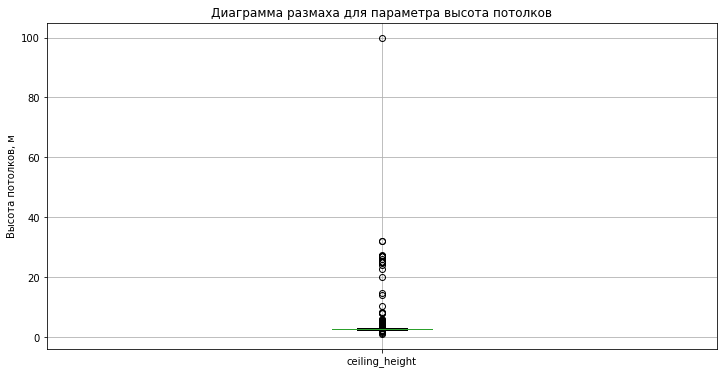

In [87]:
data[['ceiling_height']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра высота потолков')
plt.ylabel('Высота потолков, м')
plt.show()

Посчитаем количество выбросов в столбце ***ceiling_height***. Выбросами будут считаться все значения, которые больше, чем Q3 + 1.5IQR и мньше, чем Q1 - 1.5IQR.

In [88]:
ceiling_height_IQR_min, ceiling_height_IQR_max = outliers(data, 'ceiling_height')

In [89]:
print('Выбросами считаются значения, которые больше, чем {:.2f} и меньше, чем {:.2f}'.format(ceiling_height_IQR_max, ceiling_height_IQR_min))

Выбросами считаются значения, которые больше, чем 3.05 и меньше, чем 2.25


In [90]:
print('Количество выбросов в столбце ceiling_height:', len(data[(data['ceiling_height'] > ceiling_height_IQR_max) |
                                                           (data['ceiling_height'] < ceiling_height_IQR_min)]))

Количество выбросов в столбце ceiling_height: 1471


Построим гистограмму для столбца ***ceiling_height***.

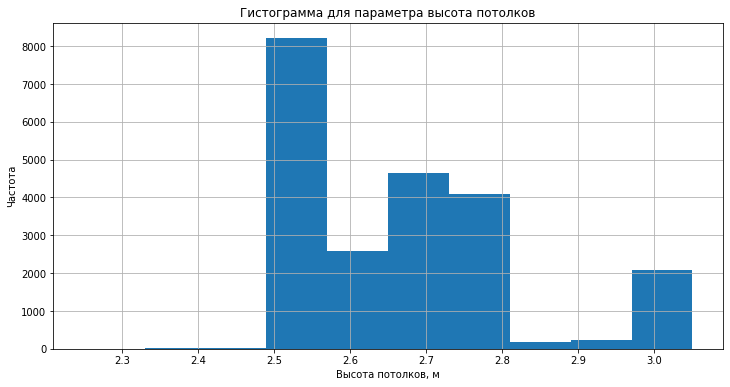

In [91]:
data['ceiling_height'].hist(range = (ceiling_height_IQR_min, ceiling_height_IQR_max), figsize = (12,6))
plt.title('Гистограмма для параметра высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

Пик находится на значениее 2.5 метра, также видно преобладание квартир с высотой потолков 2.7 метра.

### 4.2 Изучение времени продажи квартиры.<a id="проведение_исследовательского_анализа_данных__изучение_времени_продажи_квартиры"></a>

Посмотрим статистические значения для столбца ***days_exposition***.

In [92]:
days_exposition_describe = data['days_exposition'].describe()
days_exposition_describe

count    20393.000000
mean       180.747659
std        219.736349
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим гистограмму и диаграмму разамаха по столбцу ***days_exposition***.

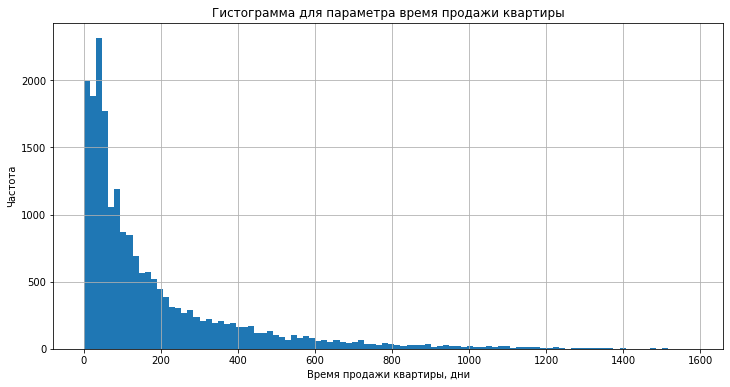

In [93]:
data['days_exposition'].hist(bins = 100, figsize = (12,6))
plt.title('Гистограмма для параметра время продажи квартиры')
plt.xlabel('Время продажи квартиры, дни')
plt.ylabel('Частота')
plt.show()

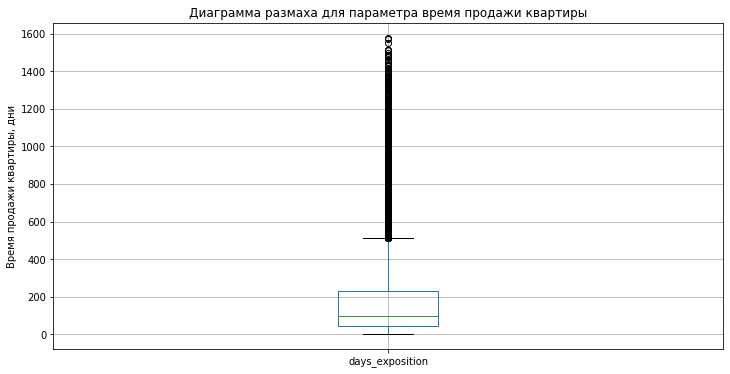

In [94]:
data[['days_exposition']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра время продажи квартиры')
plt.ylabel('Время продажи квартиры, дни')
plt.show()

Посчитаем количество выбросов в столбце ***days_exposition***. Выбросами будут считаться все значения, которые больше, чем Q3 + 1.5IQR и мньше, чем Q1 - 1.5IQR.

In [95]:
days_exposition_min, days_exposition_max = outliers(data, 'days_exposition')

In [96]:
print('Выбросами считаются значения, которые больше, чем {:} и меньше, чем {:}'.format(days_exposition_max, days_exposition_min))

Выбросами считаются значения, которые больше, чем 510.0 и меньше, чем 1.0


In [97]:
print('Количество выбросов в столбце days_exposition:', len(data[(data['days_exposition'] > days_exposition_max) |
                                                           (data['days_exposition'] < days_exposition_min)]))

Количество выбросов в столбце days_exposition: 1667


Среднее время продажи квартиры получилось 180 дней, а медиана 95 дней. Гистограмма похожа на Пуассановсое распределение. Согласно диаграмме размаха выбросами считаются все значения больше 510 дней.

Таким образом, если квартира продалась менее, чем за 95 дней, то будем считать, что это быстрая продажа. А если квартира продается более, чем 510 дней, то это продажа необычно долгая.

### 4.3 Фильтрация данных<a id="проведение_исследовательского_анализа_данных__фильтрация_данных"></a>

В предыдуущем пункте мы нашли выбросы, основываясь на диаграмме размаха. Предлагаю использовать эти данные и фильтровать данные по ним.

In [98]:
print('Для столбца total_area (общая площадь) выбросами считаются значения, которые больше, чем {:} и меньше, чем {:}'.format(total_area_IQR_max, total_area_IQR_min))
print('Для столбца last_price (цена) выбросами считаются значения, которые больше, чем {:} и меньше, чем {:}'.format(last_price_IQR_max, last_price_IQR_min))
print('Для столбца rooms (количество комнат) выбросами считаются значения, которые больше, чем {:} и меньше, чем {:}'.format(rooms_IQR_max, rooms_IQR_min))
print('Для столбца ceiling_height (высота потолков) выбросами считаются значения, которые больше, чем {:.2f} и меньше, чем {:.2f}'.format(ceiling_height_IQR_max, ceiling_height_IQR_min))

Для столбца total_area (общая площадь) выбросами считаются значения, которые больше, чем 114.25 и меньше, чем 12.0
Для столбца last_price (цена) выбросами считаются значения, которые больше, чем 11875000.0 и меньше, чем 12190
Для столбца rooms (количество комнат) выбросами считаются значения, которые больше, чем 6.0 и меньше, чем 0
Для столбца ceiling_height (высота потолков) выбросами считаются значения, которые больше, чем 3.05 и меньше, чем 2.25


In [99]:
data_filter = data.query('total_area > @total_area_IQR_min and total_area < @total_area_IQR_max')
data_filter = data_filter.query('last_price > @last_price_IQR_min and last_price < @last_price_IQR_max')
data_filter = data_filter.query('rooms > @rooms_IQR_min and rooms < @rooms_IQR_max')
data_filter = data_filter.query('ceiling_height > @ceiling_height_IQR_min and ceiling_height < @ceiling_height_IQR_max')
data_filter = data_filter.reset_index(drop=True)
data_filter
print('Процент хороших данных {:.2%}'.format(len(data_filter) / len(data)))

Процент хороших данных 86.15%


### 4.4 Факторы, влияющие на  стоимость квартиры<a id="проведение_исследовательского_анализа_данных__факторы_влияющие_на_стоимость_квартиры"></a>

#### Заисимость цены от площади квартиры

Построим диаграмму рассеяния и посчитаем коэффициент корреляции.

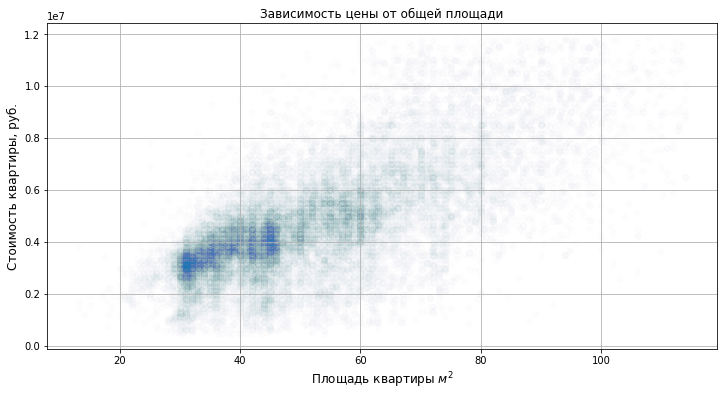

In [100]:
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.scatter(data_filter['total_area'], data_filter['last_price'], alpha =0.007)
ax1.set_xlabel(r'Площадь квартиры $м^2$', fontsize=12)
ax1.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
ax1.set_title('Зависимость цены от общей площади')
ax1.grid(True)

In [101]:
print('Коэффициент корреляции: {:.2f}'.format(data_filter['total_area'].corr(data_filter['last_price'])))

Коэффициент корреляции: 0.68


По диаграмме хорошо видна зависимость цены от площади квартиры, что также подтвержается посчитанным коэффициентом корреляции. Большинство квартир площадью 30-50 кв.м. и ценой 2-5 млн.руб. 

#### Заисимость цены от удаленности от цента

Построим диаграмму рассеяния и посчитаем коэффициент корреляции.

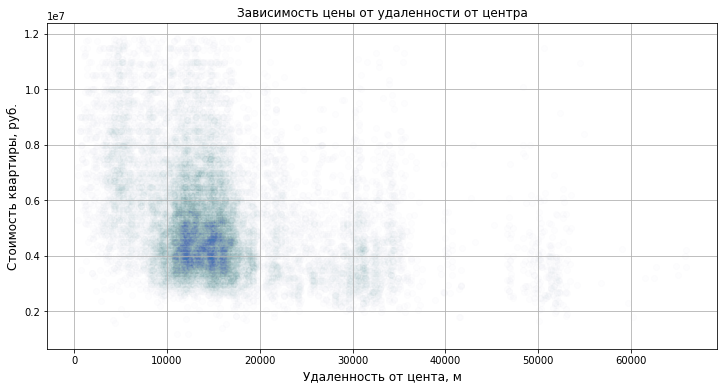

In [102]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.scatter(data_filter['cityCenters_nearest'], data_filter['last_price'], alpha =0.007)
ax2.set_xlabel('Удаленность от цента, м', fontsize=12)
ax2.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
ax2.set_title('Зависимость цены от удаленности от центра')
ax2.grid(True)

In [103]:
print('Коэффициент корреляции: {:.2f}'.format(data_filter['cityCenters_nearest'].corr(data_filter['last_price'])))

Коэффициент корреляции: -0.32


По диаграмме видно, что бОльшая часть объявлений из Санкт-Петербурга (до 20 км) и разброс цен очень большой при этом растояние от центра не сильно сказывается на цене. Но все же цена начинает падать, если квартиры находтся дальше, чем 20 км от центра.

#### Заисимость цены от числа комнат

Построим диаграмму рассеяния и посчитаем коэффициент корреляции.

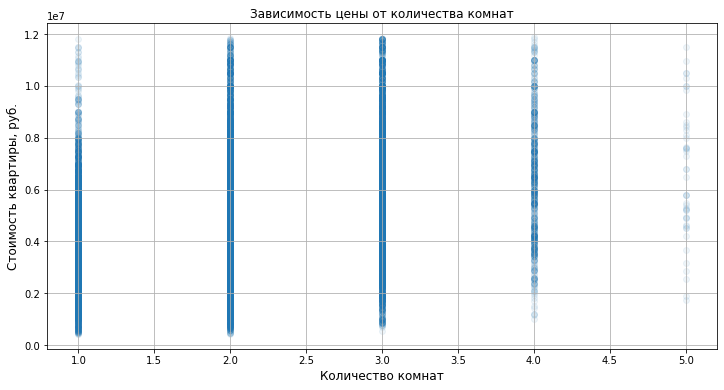

In [104]:
fig3, xy3 = plt.subplots(figsize=(12, 6))
xy3.scatter(data_filter['rooms'], data_filter['last_price'], alpha =0.07)
xy3.set_xlabel('Количество комнат', fontsize=12)
xy3.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
xy3.set_title('Зависимость цены от количества комнат')
xy3.grid(True)

In [105]:
print('Коэффициент корреляции: {:.2f}'.format(data_filter['rooms'].corr(data_filter['last_price'])))

Коэффициент корреляции: 0.41


Для более наглядного анализа, построим диаграмму размаха.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


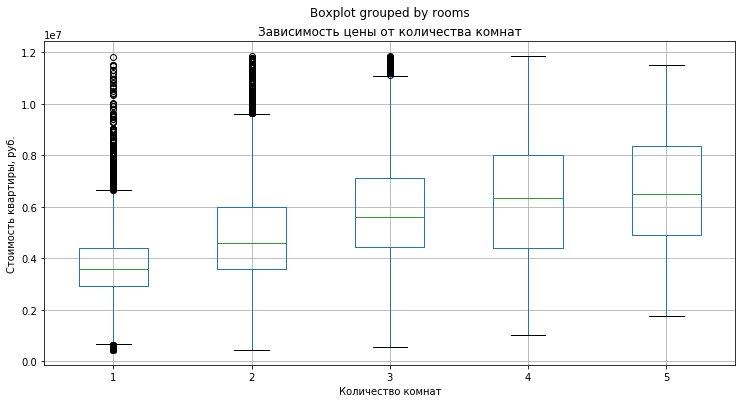

In [106]:
data_filter.boxplot(column='last_price', by='rooms', figsize = (12, 6))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Видно, как цена растет с увеличением числа комнат и какой большой разброс цен на квартиры в зависимости от количества комнат.

#### Заисимость цены от этажа

Построим диаграмму рассеяния.

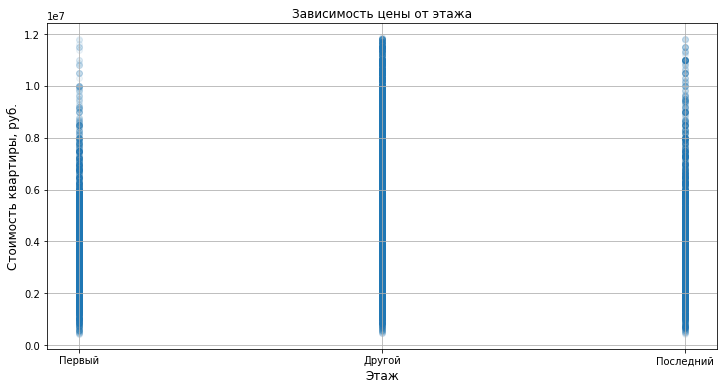

In [107]:
fig4, ax4 = plt.subplots(figsize=(12, 6))
ax4.scatter(data_filter['floor_group'], data_filter['last_price'], alpha =0.07)
ax4.set_xlabel('Этаж', fontsize=12)
ax4.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
ax4.set_title('Зависимость цены от этажа')
ax4.grid(True)

Для более наглядного анализа, построим диаграмму размаха.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


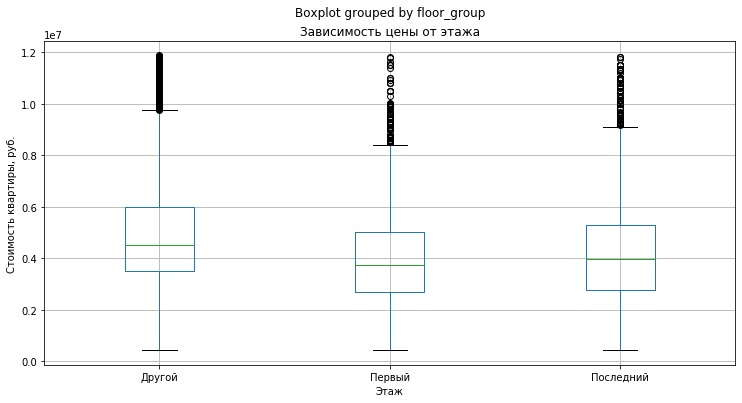

In [108]:
data_filter.boxplot(column='last_price', by='floor_group', figsize = (12, 6))
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Цены квартир, расположенных на первом и последнем этажах, практически одинаковы, но такие квартиры дешевле, чем квартиры, раположеные на других этажах.

#### Заисимость цены от дня, месяца, года подачи объявления

Построим диаграмму рассеяния и диаграмму размаха.

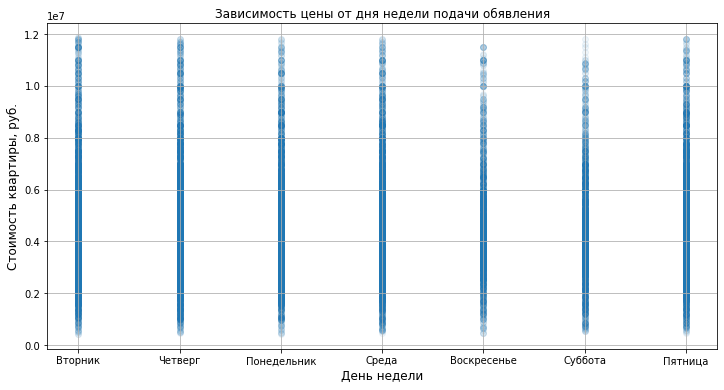

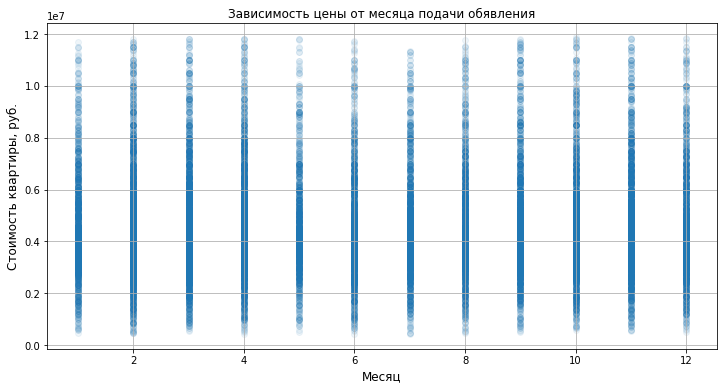

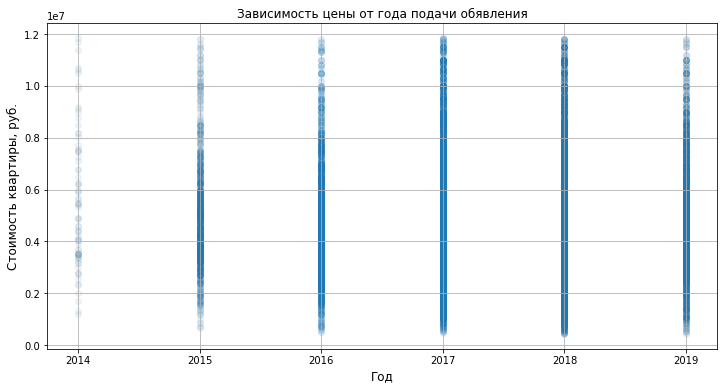

In [109]:
def output_plot(x, y, alpha=0.07, xlabel='', ylabel='', title='', figsize = (12, 6), grid=True, fontsize=12):
    fig, ax = plt.subplots(figsize = figsize)
    ax.scatter(x, y, alpha=alpha)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.grid(grid)

output_plot(data_filter['weekday_exposition'], 
            data_filter['last_price'], 
            xlabel= 'День недели',
            ylabel= 'Стоимость квартиры, руб.',
            title= 'Зависимость цены от дня недели подачи обявления'
           )
output_plot(data_filter['month_exposition'], 
            data_filter['last_price'], 
            xlabel= 'Месяц',
            ylabel= 'Стоимость квартиры, руб.',
            title= 'Зависимость цены от месяца подачи обявления'
           )
output_plot(data_filter['year_exposition'], 
            data_filter['last_price'], 
            xlabel= 'Год',
            ylabel= 'Стоимость квартиры, руб.',
            title= 'Зависимость цены от года подачи обявления'
           )

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


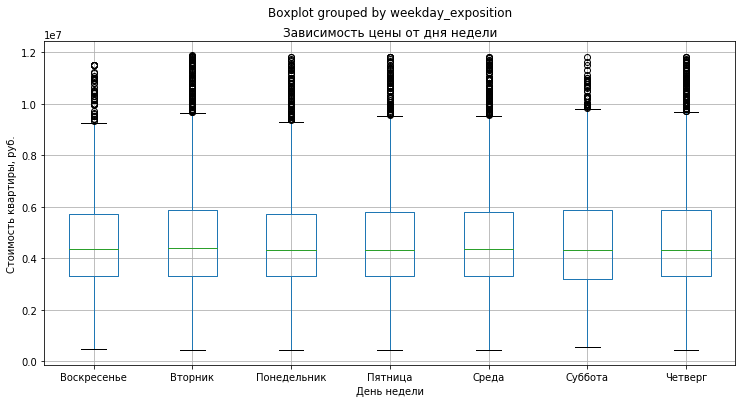

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


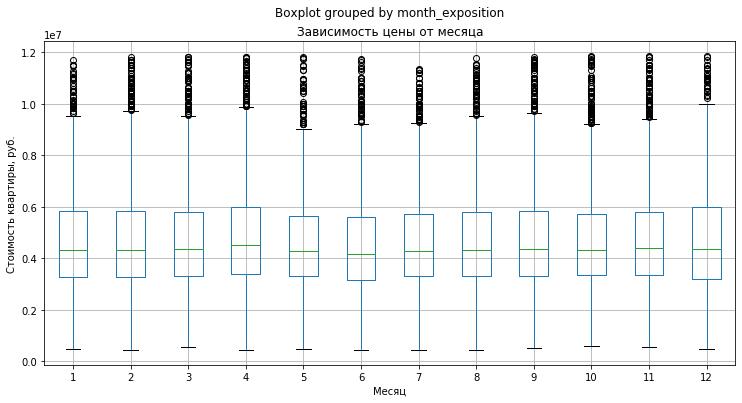

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


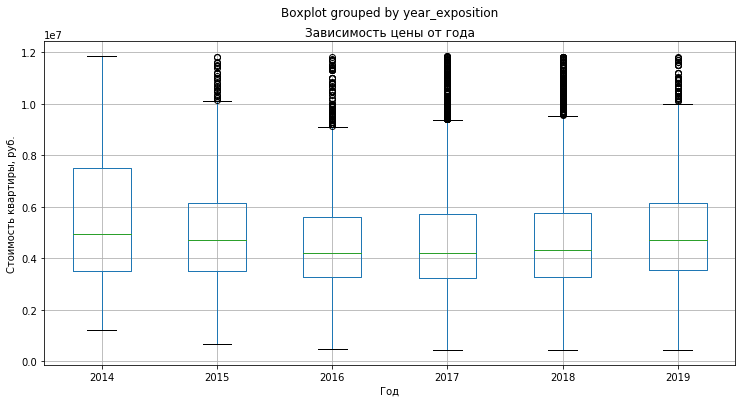

In [110]:
data_filter.boxplot(column='last_price', by='weekday_exposition', figsize = (12, 6))
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

data_filter.boxplot(column='last_price', by='month_exposition', figsize = (12, 6))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

data_filter.boxplot(column='last_price', by='year_exposition', figsize = (12, 6))
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Цены не зависят от дня и месяца подачи объявления. Стоимость квартир в 2016-2018 годах была ниже, чем в остальные годы, но и количество объявлений в эти года больше.

#### Населенные пункты с наибольшим количеством объявлений

In [111]:
data_top10 = data_filter.groupby('locality_name')['price_per_m2']

In [112]:
data_top10 = data.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc = {'count', 'mean'})
data_top10.columns = ['count', 'price_per_m2']
data_top10 = data_top10.sort_values(by = 'count', ascending = False).head(10)
data_top10

,count,price_per_m2
locality_name,,
Санкт-Петербург,15650,114869.953959
посёлок Мурино,520,85673.259928
посёлок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


In [113]:
print('В том 10 населенных пунктов по количеству объявлений входят:') 
for name in data_top10.index:
    print(' - ', name)
print()
print('В городе {} самая большая цена квадратного метра, которая составляет {:.0f} руб.'
      .format(data_top10[data_top10['price_per_m2'] == data_top10['price_per_m2'].max()].index[0],
              data_top10['price_per_m2'].max()))
print('В городе {} самая маленькая цена квадратного метра, которая составляет {:.0f} руб.'
      .format(data_top10[data_top10['price_per_m2'] == data_top10['price_per_m2'].min()].index[0], 
              data_top10['price_per_m2'].min()))

В том 10 населенных пунктов по количеству объявлений входят:
 -  Санкт-Петербург
 -  посёлок Мурино
 -  посёлок Шушары
 -  Всеволожск
 -  Пушкин
 -  Колпино
 -  посёлок Парголово
 -  Гатчина
 -  деревня Кудрово
 -  Выборг

В городе Санкт-Петербург самая большая цена квадратного метра, которая составляет 114870 руб.
В городе Выборг самая маленькая цена квадратного метра, которая составляет 58142 руб.


### 4.5 Анализ предложений квартир в Сантк-Петербурге<a id="проведение_исследовательского_анализа_данных__анализ_предложений_квартир_в_Санкт_Петербурге"></a>

Выделим объявления только из Санкт-Петербурга в отдельный DataFrame.

In [114]:
data_filter_SPB = data_filter.query('locality_name == "Санкт-Петербург"')

Проверим количество объявлений, в которых отсутствуют значения расстояние от центра и общее количество объявлений.

In [115]:
print('Количество пропущенных значений в столбце cityCenters_nearest:', data_filter_SPB['cityCenters_nearest'].isnull().sum())
print('Общее количсетво объявлений:', data_filter_SPB.shape[0])

Количество пропущенных значений в столбце cityCenters_nearest: 36
Общее количсетво объявлений: 12709


36 из 12709 это немного, поэтому удалим эти объявления.

In [116]:
data_filter_SPB = data_filter_SPB.dropna(subset = ['cityCenters_nearest']).reset_index(drop=True)

Проверим, что пустых значений не осталось.

In [117]:
print('Количество пропущенных значений в столбце cityCenters_nearest:', data_filter_SPB['cityCenters_nearest'].isnull().sum())

Количество пропущенных значений в столбце cityCenters_nearest: 0


Поменяем в столбце ***cityCenters_nearest*** значения на км и округим их.

In [118]:
data_filter_SPB['cityCenters_nearest_km'] = data_filter_SPB['cityCenters_nearest'].transform(lambda x: round(x / 1000))

Сделаем сводную таблицу зависимость средней цены от удаленности от центра и построим график.

In [119]:
data_filter_SPB_pt = data_filter_SPB.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price')

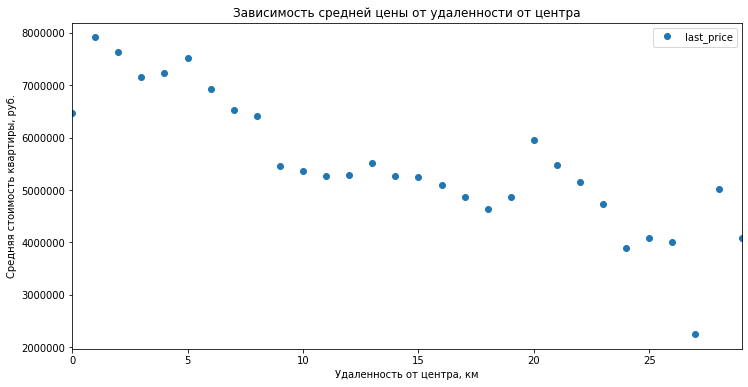

In [120]:
data_filter_SPB_pt.plot(style='o',figsize = (12,6))
plt.title('Зависимость средней цены от удаленности от центра')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Средняя стоимость квартиры, руб.')
plt.show()

In [121]:
data_filter_SPB_pt.head(10)

,last_price
cityCenters_nearest_km,
0,6.466667e+06
1,7.913015e+06
2,7.640146e+06
3,7.152244e+06
4,7.234115e+06
5,7.526231e+06
6,6.928122e+06
7,6.534411e+06
8,6.414538e+06


Центром являются квартиры, которые находтся в радиусе 8 км. Затем идет резкий провал цен, примерно на 950 тыс.руб.

In [122]:
data_filter_SPB_pt = data_filter_SPB.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_m2')

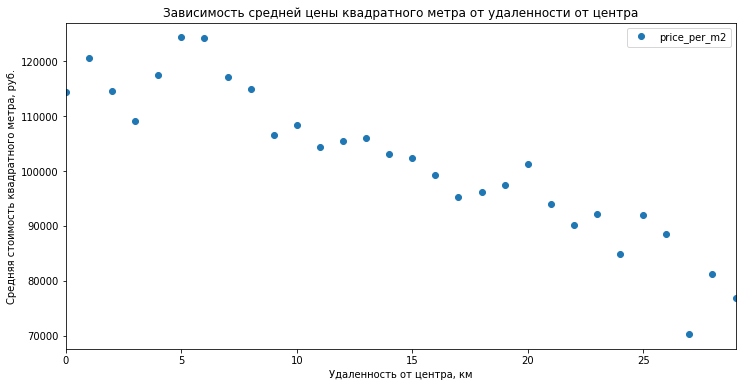

In [123]:
data_filter_SPB_pt.plot(style='o',figsize = (12,6))
plt.title('Зависимость средней цены квадратного метра от удаленности от центра')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Средняя стоимость квадратного метра, руб.')
plt.show()

### 4.6 Анализ квартир в центре Санкт-Петербурга<a id="проведение_исследовательского_анализа_данных__анализ_квартир_в_центре_Санкт_Петербурге"></a>

Выделим сегмент квартир, находящихся в центре Санкт-Петербурга.

In [124]:
data_filter_SPB_center = data_filter_SPB.query('cityCenters_nearest_km <= 8').reset_index(drop=True)

Определим количество квартир, находящихся в центре.

In [125]:
print('Общее количсетво объявлений:', data_filter_SPB_center.shape[0])

Общее количсетво объявлений: 2052


Проанализируем объяления в центре Санкт-Петербурга по следующим параметрам: общая площадь, цена, количество комнат, высота потолков.

#### Cтолбец ***total_area***.

Посмотрим статистические значения для столбца ***total_area***.

In [126]:
total_area_describe = data_filter_SPB_center['total_area'].describe()
total_area_describe

count    2052.000000
mean       61.190799
std        20.015971
min        13.000000
25%        45.000000
50%        59.300000
75%        75.000000
max       114.200000
Name: total_area, dtype: float64

Среднее значение площади квартиры в центре составляет около 60 кв.м. Построим диаграмму размаха.

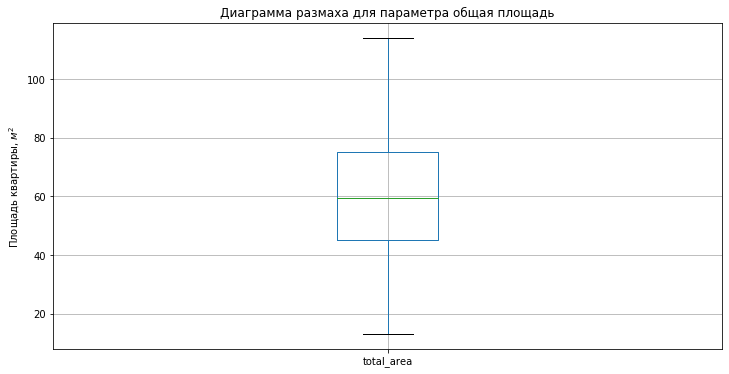

In [127]:
data_filter_SPB_center[['total_area']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра общая площадь')
plt.ylabel(r'Площадь квартиры, $м^2$')
plt.show()

Построим гистограмму для столбца ***total_area***.

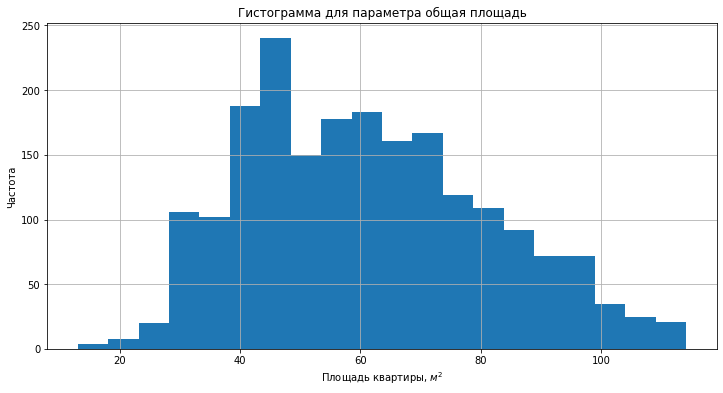

In [128]:
data_filter_SPB_center['total_area'].hist(bins=20, figsize = (12,6))
plt.title('Гистограмма для параметра общая площадь')
plt.xlabel(r'Площадь квартиры, $м^2$')
plt.ylabel('Частота')
plt.show()

Гистограмма похожа на Пуассановсое распределение с пиком в районе 45 и плавным дальнешем уменьшением.

#### Cтолбец ***last_price***.

Посмотрим статистические значения для столбца ***last_price***.

In [129]:
last_price_describe = data_filter_SPB_center['last_price'].describe()
last_price_describe

count    2.052000e+03
mean     7.034528e+06
std      2.181313e+06
min      1.600000e+06
25%      5.397500e+06
50%      6.800000e+06
75%      8.582250e+06
max      1.186686e+07
Name: last_price, dtype: float64

Средняя цена квартиры в центре Санкт-Петербурга сосавляет около 7 млн.руб. Построим диаграмму размаха.

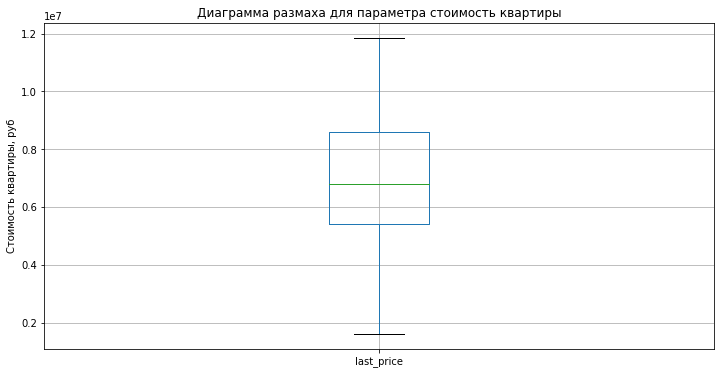

In [130]:
data_filter_SPB_center[['last_price']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра стоимость квартиры')
plt.ylabel('Стоимость квартиры, руб')
plt.show()

Построим гистограмму для столбца ***last_price***.

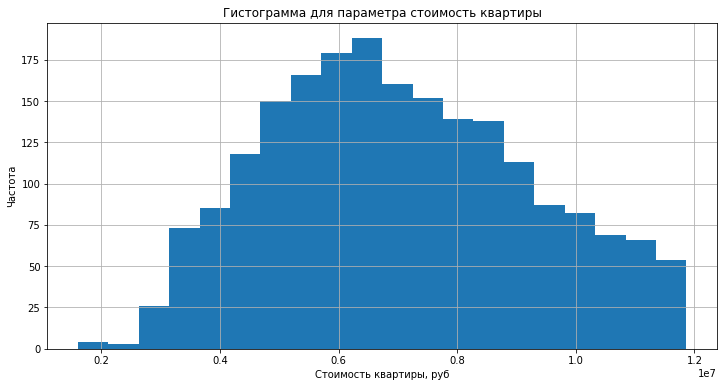

In [131]:
data_filter_SPB_center['last_price'].hist(bins=20, figsize = (12,6))
plt.title('Гистограмма для параметра стоимость квартиры')
plt.xlabel('Стоимость квартиры, руб')
plt.ylabel('Частота')
plt.show()

Гистограмма похожа на нормальное распределение с пиком в районе 6 млн.

#### Cтолбец ***rooms***.

Посмотрим статистические значения для столбца ***rooms***.

In [132]:
rooms_describe = data_filter_SPB_center['rooms'].describe()
rooms_describe

count    2052.000000
mean        2.158869
std         0.905105
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

В среднем в центре Санкт-Петербурга 2-х комнатные квартиры. Построим диаграмму размаха.

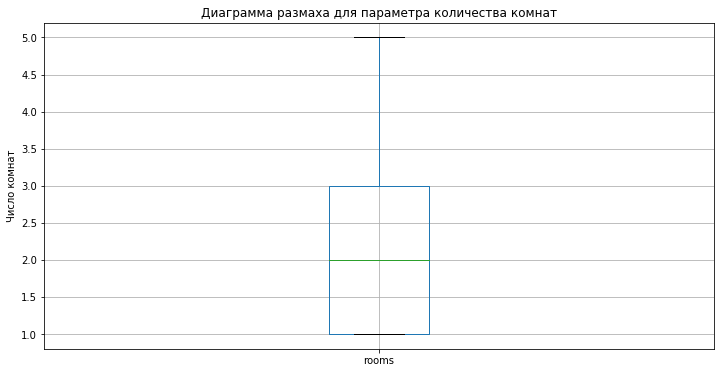

In [133]:
data_filter_SPB_center[['rooms']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра количества комнат')
plt.ylabel('Число комнат')
plt.show()

Построим гистограмму для столбца ***rooms***.

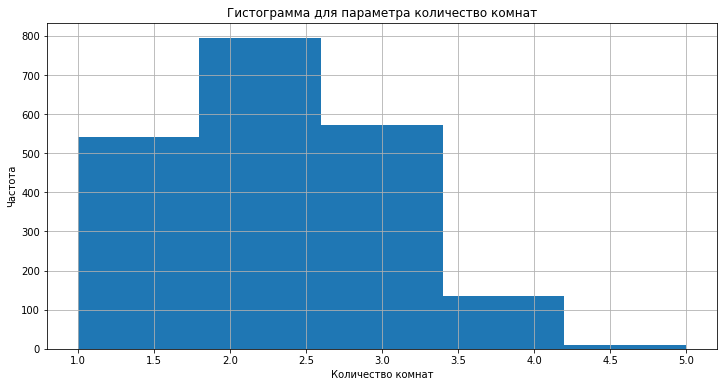

In [134]:
data_filter_SPB_center['rooms'].hist(bins=5, figsize = (12,6))
plt.title('Гистограмма для параметра количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Гистограмма похожа на нормальное распеделение с пиком в районе 2-х комнатных квартир.

#### Cтолбец ***ceiling_height***.

Посмотрим статистические значения для столбца ***ceiling_height***.

In [135]:
ceiling_height_describe = data_filter_SPB_center['ceiling_height'].describe()
ceiling_height_describe

count    2052.000000
mean        2.760107
std         0.184242
min         2.400000
25%         2.550000
50%         2.750000
75%         3.000000
max         3.050000
Name: ceiling_height, dtype: float64

В среднем в центре Санкт-Петербурга квартиры с высотой потолков 2.75 метров.

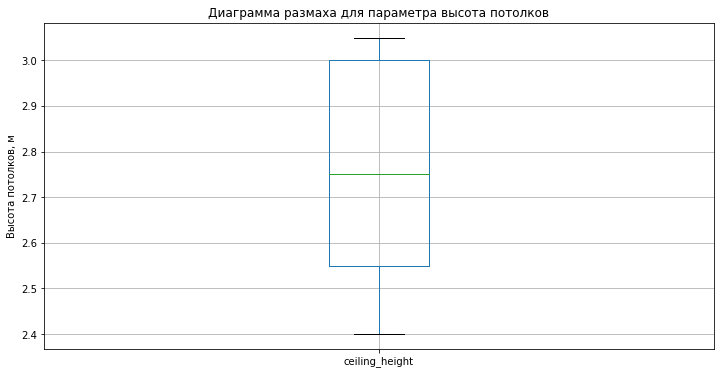

In [136]:
data_filter_SPB_center[['ceiling_height']].boxplot(figsize = (12,6))
plt.title('Диаграмма размаха для параметра высота потолков')
plt.ylabel('Высота потолков, м')
plt.show()

Построим гистограмму для столбца ***ceiling_height***.

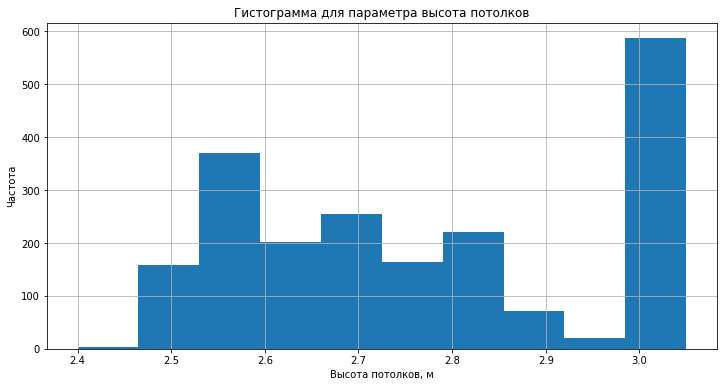

In [137]:
data_filter_SPB_center['ceiling_height'].hist(figsize = (12,6))
plt.title('Гистограмма для параметра высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

В центре Санкт-Петербурга очень много квартир с высотой потолков 3 метра, если исключить эти квартиры из гистограммы, то она будет напонимать Гауссовское распределение с центом в районе 2.55 метров и дальнейшим плавным уменьшением.

Проанализируем цену квартир в центре Санкт-Петербурга в зависимости от следующих парамтеров: площадь квартиры, удаленность от центра, количества комнат и этажа.

#### Заисимость цены от площади квартиры в центре Санкт-Петербурга

Построим диаграмму рассеяния и посчитаем коэффициент корреляции.

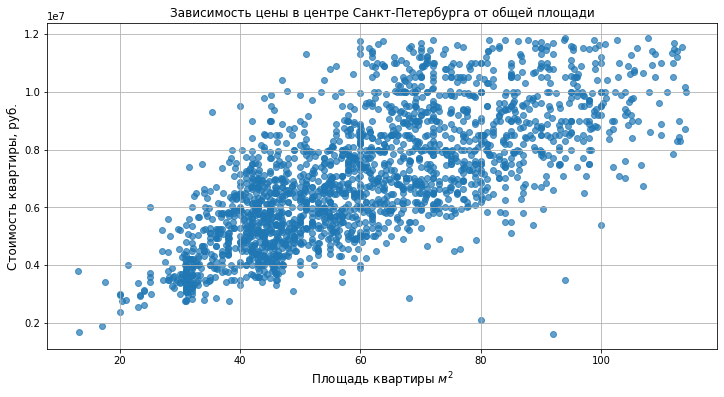

In [138]:
fig8, ax8 = plt.subplots(figsize=(12, 6))
ax8.scatter(data_filter_SPB_center['total_area'], data_filter_SPB_center['last_price'], alpha =0.7)
ax8.set_xlabel(r'Площадь квартиры $м^2$', fontsize=12)
ax8.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
ax8.set_title('Зависимость цены в центре Санкт-Петербурга от общей площади')
ax8.grid(True)

In [139]:
print('Коэффициент корреляции: {:.2f}'.format(data_filter_SPB_center['total_area'].corr(data_filter_SPB_center['last_price'])))

Коэффициент корреляции: 0.71


По диаграмме хорошо видна зависимость цены от площади квартиры, что также подтвержается посчитанным коэффициентом корреляции. Большинство квартир площадью 40-60 кв.м. и ценой 4-8 млн.руб. 

Квартиры в центре Санкт-Петербурга в среднем больше по площади (40-60 кв.м), чем квартиры в Санкт-Петербурге и области (30-50 кв.м).

Также в центре Санкт-Петербурга в среднем выше цена квартир (4-8 млн.руб.), чем у квартир в Санкт-Петербурге и области (2-5 млн.руб.)

#### Заисимость цены от удаленности от цента  в центре Санкт-Петербурга

Построим диаграмму рассеяния и посчитаем коэффициент корреляции.

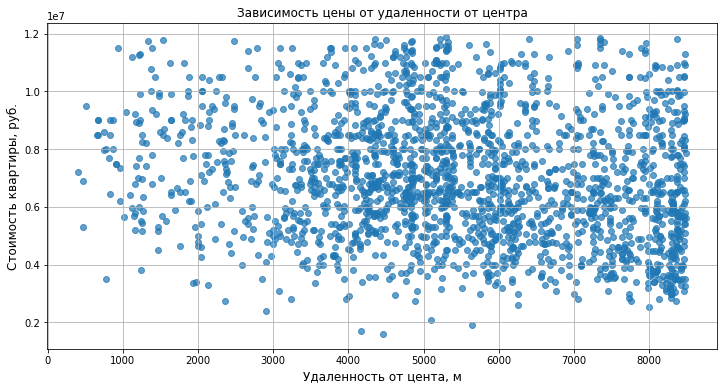

In [140]:
fig9, ax9 = plt.subplots(figsize=(12, 6))
ax9.scatter(data_filter_SPB_center['cityCenters_nearest'], data_filter_SPB_center['last_price'], alpha =0.7)
ax9.set_xlabel('Удаленность от цента, м', fontsize=12)
ax9.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
ax9.set_title('Зависимость цены от удаленности от центра')
ax9.grid(True)

In [141]:
print('Коэффициент корреляции: {:.2f}'.format(data_filter_SPB_center['cityCenters_nearest'].corr(data_filter_SPB_center['last_price'])))

Коэффициент корреляции: -0.18


Видно, что зависмости нет и цена не меняется, так как все квартиры и так сосредоточены в центре.

Цены квартир в радиусе 8 км при удаленности от центра практически не меняются, но если рассматривать все объявления в Санкт-Петербурге и области, то уменьшение цены при удаленности от центра все же уменьшается.

#### Заисимость цены от числа комнат  в центре Санкт-Петербурга

Построим диаграмму рассеяния и посчитаем коэффициент корреляции.

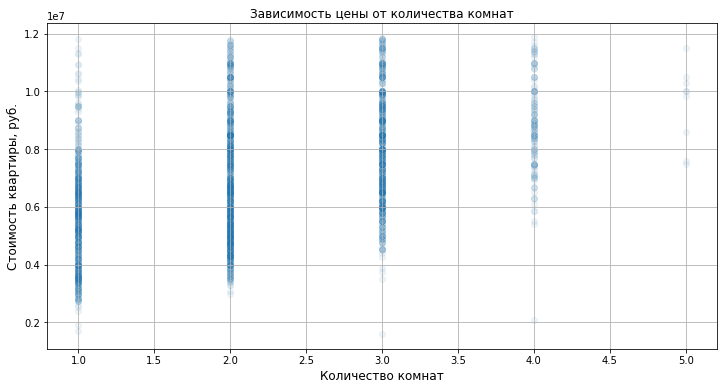

In [142]:
fig10, xy10 = plt.subplots(figsize=(12, 6))
xy10.scatter(data_filter_SPB_center['rooms'], data_filter_SPB_center['last_price'], alpha =0.07)
xy10.set_xlabel('Количество комнат', fontsize=12)
xy10.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
xy10.set_title('Зависимость цены от количества комнат')
xy10.grid(True)

In [143]:
print('Коэффициент корреляции: {:.2f}'.format(data_filter_SPB_center['rooms'].corr(data_filter_SPB_center['last_price'])))

Коэффициент корреляции: 0.45


Для более наглядного анализа, построим диаграмму размаха.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


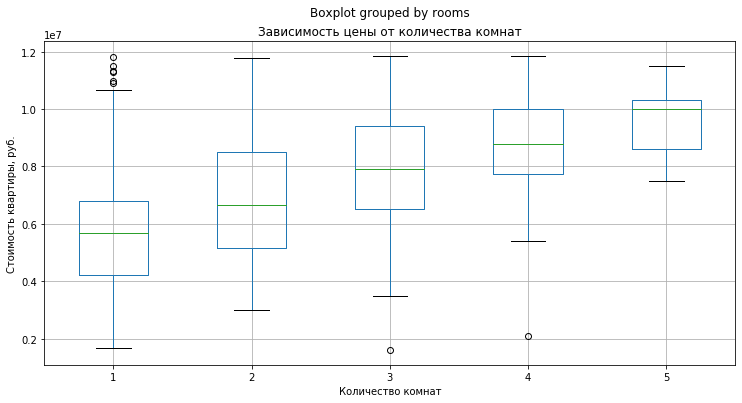

In [144]:
data_filter_SPB_center.boxplot(column='last_price', by='rooms', figsize = (12, 6)) 
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Видно, как цена растет с увеличением числа комнат и какой большой разброс цен на квартиры в зависимости от количества комнат.

Как и в центре Санкт-Петербурга, так и в целом по Санкт-петербургу и области, цена квартиры увеличивается с увеличением числа комнат.

#### Заисимость цены от этажа  в центре Санкт-Петербурга

Построим диаграмму рассеяния.

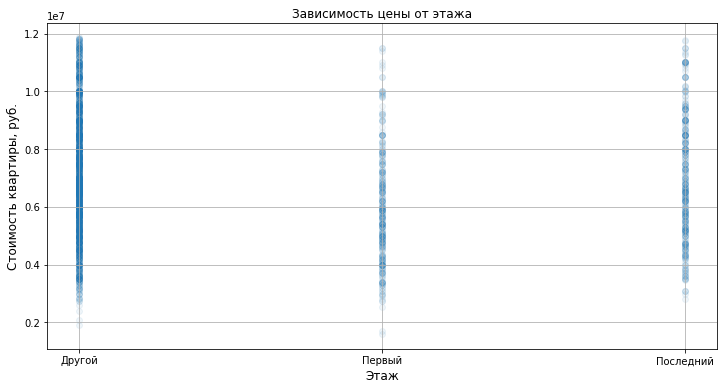

In [145]:
fig11, ax11 = plt.subplots(figsize=(12, 6))
ax11.scatter(data_filter_SPB_center['floor_group'], data_filter_SPB_center['last_price'], alpha =0.07)
ax11.set_xlabel('Этаж', fontsize=12)
ax11.set_ylabel('Стоимость квартиры, руб.', fontsize=12)
ax11.set_title('Зависимость цены от этажа')
ax11.grid(True)

Для более наглядного анализа, построим диаграмму размаха.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


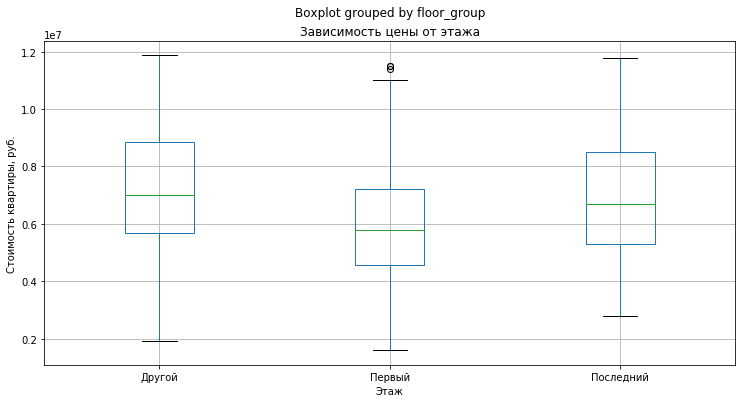

In [146]:
data_filter_SPB_center.boxplot(column='last_price', by='floor_group', figsize = (12, 6))
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Цена квартиры на первом этаже значительно дешевле, чем на других этажах.

Как и в центре Санкт-Петербурга, так и в целом по Санкт-петербургу и области, цена квартиры, расположенных на первом этаже, ниже, чем на других этажах.

#### Заисимость цены в центре Санкт-Петербурга от дня, месяца, года подачи объявления

Построим диаграмму рассеяния и диаграмму размаха.

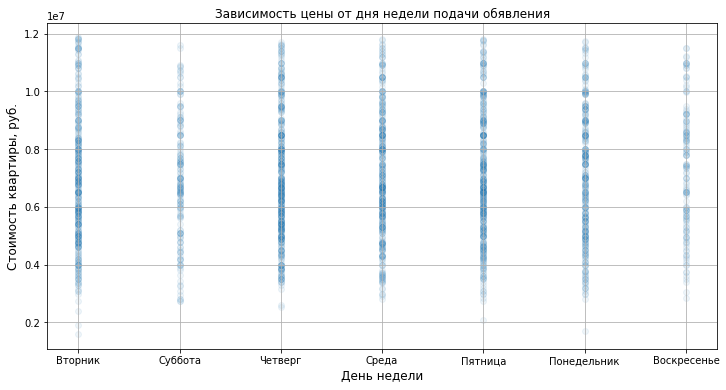

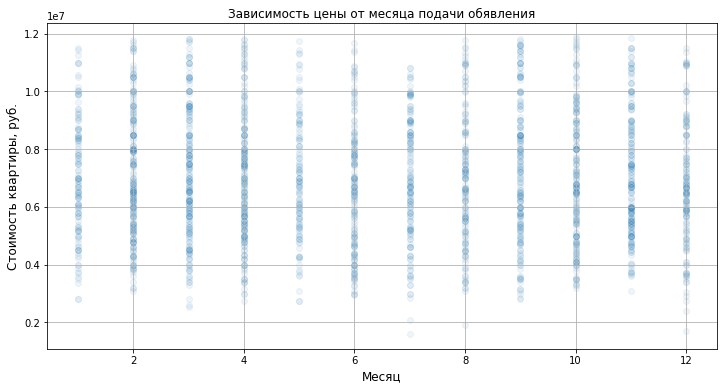

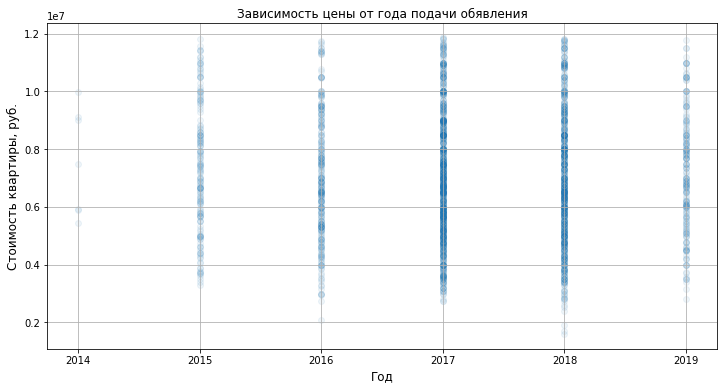

In [147]:
output_plot(data_filter_SPB_center['weekday_exposition'], 
            data_filter_SPB_center['last_price'], 
            xlabel= 'День недели',
            ylabel= 'Стоимость квартиры, руб.',
            title= 'Зависимость цены от дня недели подачи обявления',
            alpha= 0.07
           )
output_plot(data_filter_SPB_center['month_exposition'], 
            data_filter_SPB_center['last_price'], 
            xlabel= 'Месяц',
            ylabel= 'Стоимость квартиры, руб.',
            title= 'Зависимость цены от месяца подачи обявления',
            alpha= 0.07
           )
output_plot(data_filter_SPB_center['year_exposition'], 
            data_filter_SPB_center['last_price'], 
            xlabel= 'Год',
            ylabel= 'Стоимость квартиры, руб.',
            title= 'Зависимость цены от года подачи обявления',
            alpha= 0.07
           )

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


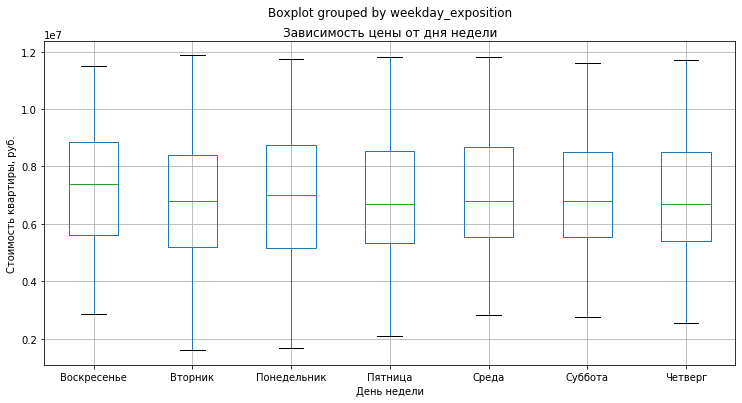

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


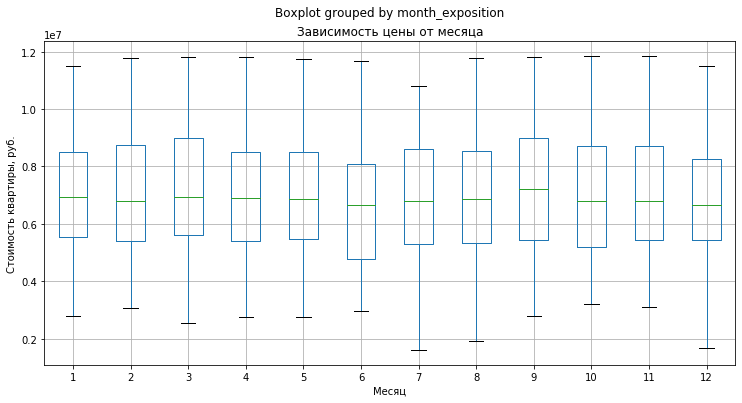

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


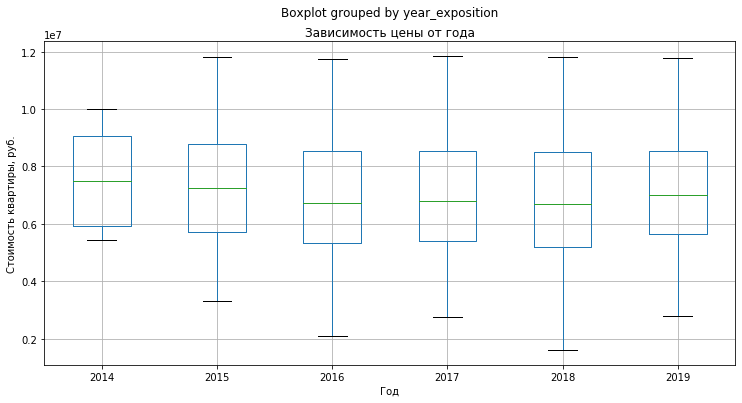

In [148]:
data_filter_SPB_center.boxplot(column='last_price', by='weekday_exposition', figsize = (12, 6))
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

data_filter_SPB_center.boxplot(column='last_price', by='month_exposition', figsize = (12, 6))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

data_filter_SPB_center.boxplot(column='last_price', by='year_exposition', figsize = (12, 6))
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Квартиры, размещенные на продажу в восвресенья, продаются дороже, чем в другие дни. Зависимости цены от месяца создания объявления практически нет. Начиная с 2016 года средняя цена квартир упала.

День недели подачи объявления не влияет на цену квартир для квартир, расположенных в Санкт-Петербурге и области, однако для квартир, которые расположены в центре Санкт-петербурга лучше объявления подавать в воскресенье, так цена таких квартир выше. 

Месяц подачи объявления не влияет на цену квартир ни для квартир, расположенных в центре Санкт-Петербурга, ни для квартир расположенных во всем Санкт-Петербурге и области.

В целом с 2016 года цена квартиры упала, как для квартир расположенных в центре Санкт-Петербурга, так и для все квартир в Санкт-Петербурге и области.

### Вывод

***Изучили следующие параметры: площадь, цена, число комнат, высота потолков.***
    
   ***Площадь***. Средняя площадь квартиры по всем объявлением составляет 60.38 кв.м, медиана же составляет 52 кв.м. Это объяняется аномальными данными, например, максимальное значение составляет 900 кв.м и в целом большим количеством выбросов по данному параметру, которые соствляют 1238. Выбросами считались значения, которые больше, чем 114.5 и меньше, чем 12.0. Гистограмма похожа на Пуассановсое распределение с пиком в районе 45 и плавным дальнешем уменьшением;         
    ***Цена***. Средняя цена квартиры по всем объявлением составляет 6.54 млн. руб, медиана же составляет 4.65 млн. руб. Это объяняется аномальными данными, например, максимальное значение составляет 763 млн. руб. и в целом большим количеством выбросов по данному параметру, которые соствляют 2049. Выбросами считались значения, которые больше, чем 11897500 и меньше, чем 12190. Гистограмма похожа на нормальное распределение с пиком в районе 4 млн;         
    ***Число комнат***. Среднее количество комнат в квартире по всем объявлением соствляет 2.07, медиана же составляет 2. Анамальных данных здесь немного, разве что 19 комнат в квартире. Количество выбросов 86. Выбросами считались значения, которые больше, чем 6 и меньше, чем 0. Гистограмма похожа на Пуассановсое распределение с пиком в районе 1-х и 2-х комнатных квартир и дальнейшем уменьшением;             
    ***Высота потолков***. Среднее количество комнат в квартире по всем объявлением соствляет 2.73, медиана же составляет 2.65. В целом, аномальные данные присутствуют в столбце, например квартира с 100 метровыми поталками. Количество выбросов 1475. Выбросами считались значения, которые больше, чем 3.05 и меньше, чем 2.25. Гистограмма показывает, что пик находится на значениее 2.5 метра, также видно преобладание квартир с высотой потолков 2.7 метра.

***Изучили время продажи квартиры.***
    
   В среднем квартира продается за 180 дней, медиана же составляет 95 дней. Это объяняется аномальными данными, например, максимальное значение составляет 1580 дней, а минимальное 1 день и в целом большим количеством выбросов по данному параметру, которые соствляют 1663. Выбросами считаются значения, которые больше, чем 512.5 и меньше, чем 1.0. Гистограмма похожа на Пуассановсое распределение с пиком в районе 40 дней и плавным дальнешем уменьшением. Таким образом, если квартира продалась менее, чем за 95 дней, то будем считать, что это быстрая продажа. А если квартира продается более, чем 512 дней, то это продажа необычно долгая.
    
***Выделили хорошие данные***
     
   Фильтровали данные основываясь на выбросах:
     
   Для столбца ***total_area (общая площадь)*** выбросами считаются значения, которые больше, чем 114.5 и меньше, чем 12.0;               
   Для столбца ***last_price (цена)*** выбросами считаются значения, которые больше, чем 11897500.0 и меньше, чем 12190;                  
   Для столбца ***rooms (количество комнат)*** выбросами считаются значения, которые больше, чем 6.0 и меньше, чем 0;                  
   Для столбца ***ceiling_height (высота потолков)*** выбросами считаются значения, которые больше, чем 3.05 и меньше, чем 2.25.
    
   В результате процент хороших данных составил 86.16%.
    
***Выделили и проанализировали факторы, влияющие на стоимость квартиры*** 
    
   ***Заисимость цены от площади квартиры***. Построили диаграмму рассеяния. По диаграмме хорошо видна зависимость цены от площади квартиры, что также подтвержается посчитанным коэффициентом корреляции, который составил 0.68. Большинство квартир площадью 30-50 кв.м. и ценой 2-5 млн.руб;             
    ***Заисимость цены от удаленности от центра***. Построили диаграмму рассеяния. По диаграмме видно, что бОльшая часть объявлений из Санкт-Петербурга (до 20 км) и разброс цен очень большой при этом растояние от центра не сильно сказывается на цене. Но все же цена начинает падать, если квартиры находтся дальше, чем 20 км от центра. Коэффициент корреляции составил -0.32;               
    ***Зависимость цены от количества комнат*** Построили диаграмму рассеяния и диаграмму размаха. По диаграмме размаха видно, как цена растет с увеличением числа комнат и какой большой разброс цен на квартиры в зависимости от количества комнат. Коэффициент корреляции составил 0.41;                
    ***Зависимость цены от этажа (первый, последний, другой)*** Построили диаграмму рассеяния и диаграмму размаха. Цены квартир, расположенных на первом и последнем этажах, практически одинаковы, но такие квартиры дешевле, чем квартиры, раположеные на других этажах.              
    ***Заисимость цены от дня, месяца, года подачи объявления*** Построили диаграмму рассеяния и диаграмму размаха. Цены не зависят от дня и месяца подачи объявления. Стоимость квартир в 2016-2018 годах была ниже, чем в остальные годы, но и количество объявлений в эти года больше.
    
***Провели анализ предложений квартир в Сантк-Петербурге***
    
   Количество объявлений в Санкт-петербурге составило 12709. Построили график зависимости стоимости квартиры в зависимотсти от удаленности от центра. По графику видно, что центром являются квартиры, которые находтся в радиусе 8 км. Затем идет резкий провал цен, примерно на 950 тыс.руб.
    
***Анализ квартир в центре Санкт-Петербурга***
    
   Выделили квартиры, которые находятся в центре Санкт-Петербурга (в радиусе 8 км), таких объявлений оказалось 2053. 
    
   Проанализировали объяления в центре Санкт-Петербурга по следующим параметрам: общая площадь, цена, количество комнат, высота потолков.
    
   ***Площадь***. Средняя площадь квартиры по всем объявлением составляет 61.2 кв.м, медиана же составляет 59.4 кв.м. Гистограмма похожа на Пуассановсое распределение с пиком в районе 45 и плавным дальнешем уменьшением;         
    ***Цена***. Средняя цена квартиры по всем объявлением составляет 7.03 млн. руб, медиана же составляет 6.8 млн. руб. Гистограмма похожа на нормальное распределение с пиком в районе 6 млн:         
    ***Число комнат***. Среднее количество комнат в квартире по всем объявлением соствляет 2.16, медиана же составляет 2. Гистограмма похожа на нормальное распеделение с пиком в районе 2-х комнатных квартир;          
    ***Высота потолков***. Среднее количество комнат в квартире по всем объявлением соствляет 2.76, медиана же составляет 2.75. В центре Санкт-Петербурга очень много квартир с высотой потолков 3 метра, если исключить эти квартиры из гистограммы, то она будет напонимать Гауссовское распределение с центом в районе 2.55 метров и дальнейшим плавным уменьшением.
    
   Выделили и проанализировали факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга
    
   ***Заисимость цены от площади квартиры***. Построили диаграмму рассеяния. По диаграмме хорошо видна зависимость цены от площади квартиры, что также подтвержается посчитанным коэффициентом корреляции, который составил 0.71. Большинство квартир площадью 40-60 кв.м. и ценой 4-8 млн.руб.             
    ***Заисимость цены от удаленности от центра***. Построили диаграмму рассеяния. Видно, что зависмости нет и цена не меняется, так как все квартиры и так сосредоточены в центре. Коэффициент корреляции составил -0.17;             
    ***Зависимость цены от количества комнат*** Построили диаграмму рассеяния и диаграмму размаха. По диаграме видно, как цена растет с увеличением числа комнат и какой большой разброс цен на квартиры в зависимости от количества комнат. Коэффициент корреляции составил 0.45;                
    ***Зависимость цены от этажа (первый, последний, другой)*** Построили диаграмму рассеяния и диаграмму размаха. Цена квартиры на первом этаже значительно дешевле, чем на других этажах;                  
    ***Заисимость цены от дня, месяца, года подачи объявления*** Построили диаграмму рассеяния и диаграмму размаха. Квартиры, размещенные на продажу в воскресеньк, продаются дороже, чем в другие дни. Зависимости цены от месяца подачи объявления практически нет. Начиная с 2016 года средняя цена квартир упала.
    
 Если сравнивать факторы для центра Санкт-Петербурга и для всего Санкт-Петербурга и области, то можно сделать следующие выводы:
   * Квартиры в центре Санкт-Петербурга в среднем больше по площади (40-60 кв.м), чем квартиры в Санкт-Петербурге и области (30-50 кв.м).Также в центре Санкт-Петербурга в среднем выше цена квартир (4-8 млн.руб.), чем у квартир в Санкт-Петербурге и области (2-5 млн.руб.);
   * Цены квартир в радиусе 8 км при удаленности от центра практически не меняются, но если рассматривать все объявления в Санкт-Петербурге и области, то уменьшение цены при удаленности от центра все же уменьшается;
   * Как и в центре Санкт-Петербурга, так и в целом по Санкт-петербургу и области, цена квартиры увеличивается с увеличением числа комнат;
   * Как и в центре Санкт-Петербурга, так и в целом по Санкт-петербургу и области, цена квартиры, расположенных на первом этаже, ниже, чем на других этажах;
   * День недели подачи объявления не влияет на цену квартир для квартир, расположенных в Санкт-Петербурге и области, однако для квартир, которые расположены в центре Санкт-петербурга лучше объявления подавать в воскресенье, так цена таких квартир выше;
   * Месяц подачи объявления не влияет на цену квартир ни для квартир, расположенных в центре Санкт-Петербурга, ни для квартир, расположенных во всем Санкт-Петербурге и области;
   * В целом с 2016 года цена квартиры упала, как для квартир расположенных в центре Санкт-Петербурга, так и для все квартир в Санкт-Петербурге и области.

## Общий вывод<a id="общий_вывод"></a>

Целью данного проекта было провести анализ объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктов за несколько лет. В результате, проделанной работы, нам удалось следующее:

1. Изучить общую информацию о данных. 

    *Таблица содержит 23699 объявлений и 20 столбцов с информацией об объявлении, а именно:*
    * airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    * balcony — число балконов
    * ceiling_height — высота потолков (м)
    * cityCenters_nearest — расстояние до центра города (м)
    * days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    * first_day_exposition — дата публикации
    * floor — этаж
    * floors_total — всего этажей в доме
    * is_apartment — апартаменты (булев тип)
    * kitchen_area — площадь кухни в квадратных метрах (м²)
    * last_price — цена на момент снятия с публикации
    * living_area — жилая площадь в квадратных метрах(м²)
    * locality_name — название населённого пункта
    * open_plan — свободная планировка (булев тип)
    * parks_around3000 — число парков в радиусе 3 км
    * parks_nearest — расстояние до ближайшего парка (м)
    * ponds_around3000 — число водоёмов в радиусе 3 км
    * ponds_nearest — расстояние до ближайшего водоёма (м)
    * rooms — число комнат
    * studio — квартира-студия (булев тип)
    * total_area — площадь квартиры в квадратных метрах (м²)
    * total_images — число фотографий квартиры в объявлении.
    
    
2. Провести предобработку данных. 
    
    *Удалили или восстановили информацию в следующих слолбцах:*
    - ***floors_total***. У 86 объявлений отсутствовала инфомарция об этажности здания и востановить данные не получилось, поэтому пришлось удалить эти объявления. Так как таких объявлений мало, то на результатах исследования это не сказалось.           
    **Рекомендации**: не позволять пользователю подать объявление пока не будет заполнен этот пункт;
    - ***ceiling_height***. У 9118 объявлений отсутствовала информация о высоте потолков в квартире. Это большая часть объявление, поэтому было принято решение восстановить эти данные путем замены в пропущенных объявлений на значение медианы в зависимости от количества этажей в доме;                   
    **Рекомендации**: не позволять пользователю подать объявление пока не будет заполнен этот пункт или искать эту инфомацию в других объявлениях по этому дому;
    - **living_area**. У 1870 объявлений отсутствовала информация о жилой площади в квартире. Было решено заменить пропущенные значения на значение медианы в зависимости от количества комнат в квартире.        
    **Рекомендации**: не позволять пользователю подать объявление пока не будет заполнен этот пункт или искать эту инфомацию в выписке из ЕГРН (если будет такая возможность);
    - ***kitchen_area***. У 2231 объявлений отсутствовала информация о площади кухни в квартире. Было решение сначала вычислить значение оставшейся площади в квартире, путем вычитания из общей площади квартиры жилой площади. Были выделены 4 категории оставшейся площади квартиры (очень маленькая, маленькая, средняя, большая), путем разбиения выборки на квартили. Пропущенные значения были заменены на значения медианы в зависимости от категории оставшейся площади квартиры.         
     **Рекомендации**: не позволять пользователю подать объявление пока не будет заполнен этот пункт или искать эту инфомацию в выписке из ЕГРН (если будет такая возможность);
    - ***is_apartment***. У 20838 объявлений отсутствовала информация о том, является ли квартира апартаментами. Предположительно, что не все люди понимают значения этого слова, поэтому и пропускали данный пункт. Те кто понимают значения этого слово явно указали является ли квартира апартаментами. Было решение все пропущенные значения заменить на False, так как если у человека квартира является апартаментами, он бы это явно знал и указал.    
     **Рекомендации**: не позволять пользователю подать объявление пока не будет заполнен этот пункт и писать примечание о значении слова апартаменты;
    - ***balcony***. У 11480 объявлений отсутствовала информация о количестве балконов в квартире. Было предположение, что если человек оставил это поле пустым, то у него отсутствуют балконы в квартиры, поэтому все пропущенные значения были заменены на 0.
     **Рекомендации**: не позволять пользователю подать объявление пока не будет заполнен этот пункт или если человек не заполнил этот пункт, то по умолчанию заполнять его 0;
    - ***parks_around3000*** и ***parks_nearest***. У 5508 отсутствовала инофмация о количестве парков в радиусе 3 км и у 15567 отсутствовала информация о расстоянии до ближайщего парка. Также у 10063 объявлений в графе количество парков было значение 0. Так как эти данные выгружает автоматичсекая система, основываясь на картографических данных, то было предположено, что у 5508 объявлений отсутствовала ифномарция о количестве парков в радиусе 3 км, так как картографиечские данные не располагали этой информацией. Было решение не заменять данные в этих столбцах, так как нет никакой зависимости количества ближайщих парков и расстония до них от других предоставленных параметров.                
     **Рекомендации**: улучшать картографические сервисы или позволять пользователю вводить эти данные, если в картографических данных эта информация отсутствует;
    - ***ponds_around3000*** и ***ponds_nearest***.  У 5508 отсутствовала инофмация о количестве водоемов в радиусе 3 км и у 14552 отсутствовала информация о расстоянии до ближайщего водоема. Также у 9044 объявлений в графе количество водоемов было значение 0. Так как эти данные выгружает автоматичсекая система, основываясь на картографических данных, то было предположено, что у 5508 объявлений отсутствовала ифномарция о количестве водоемов в радиусе 3 км, так как картографиечские данные не располагали этой информацией. Было решение не заменять данные в этих столбцах, так как нет никакой зависимости количества ближайщих водоемов и расстония до них от других предоставленных параметров.            
     **Рекомендации**: улучшать картографические сервисы или позволять пользователю вводить эти данные, если в картографических данных эта информация отсутствует;
    - ***airports_nearest*** и ***cityCenters_nearest***. У 5532 объявлений отсутствовала информация о расстоянии до ближайщего аэропорта и у 5509 отсутствовала информация о расстоянии до цента. Было предположение восстановить информацию о расстояниии до центра основываясь на расстоянии до аэропорта, но у всех объявлений, в которых отсутсвует информация о расстоянии до центра, также отсутствует информация о расстоянии до аэропорта. Затем была идея востановить данные основываясь на расстоянии до центра из других объявлений из этого же населенного пункта, но выяснилось, что у 261 из 284 населенных пунктов полностью отсутсвтует эта информация. Было принять решение не восстанавливать информацию в этих столбцах.             
     **Рекомендации**: улучшать картографические сервисы или позволять пользователю вводить эти данные, если в картографических данных эта информация отсутствует;
    - ***days_exposition***. У 3172 объявлений отсутствовала информация о количестве дней размещения объявления. Так как восстановить информацию не позволяет возможным, например, квартира еще не продана или продана уже давно, но не закрыли объявление, то принято решение не восстанавливать данные в этом столбце.          
     **Рекомендации**: если объявление висит уже долго, то отправлять напоминание пользователю на почту о скором закрытии объявления, например, каждый месяц;

   *Был проведен поиск дубликатов в таблице.* 
   
   Дубликатов в таблице не оказалось.
   
   *Заменили тип данных в следующих столбцах:*
   - ***last_price, floors_total, balcony, other_area***. Заменили тип данных на int. Причина: данные значения должны быть целочисленными;
   - ***first_day_exposition***. Заменили тип данных на datetime. Причина: дальнейшее удобство анализировать данные о дате подачи объявления (день недели, месяц, год).
   
   
3. Посчитать и добавть для дальнейшего анализа в таблицу следующие данные:
    - цену квадратного метра;
    - день недели, месяц и год публикации объявления;
    - этаж квартиры (первый, последний, другой);
    - соотношение жилой площади к общей площади;
    - соотношение площади кухни к общей площади.


4. Провести исследовательский анализ данных.

    ***Изучили следующие параметры: площадь, цена, число комнат, высота потолков.***
    
    ***Площадь***. Средняя площадь квартиры по всем объявлением составляет 60.38 кв.м, медиана же составляет 52 кв.м. Это объяняется аномальными данными, например, максимальное значение составляет 900 кв.м и в целом большим количеством выбросов по данному параметру, которые соствляют 1238. Выбросами считались значения, которые больше, чем 114.5 и меньше, чем 12.0. Гистограмма похожа на Пуассановсое распределение с пиком в районе 45 и плавным дальнешем уменьшением;         
    ***Цена***. Средняя цена квартиры по всем объявлением составляет 6.54 млн. руб, медиана же составляет 4.65 млн. руб. Это объяняется аномальными данными, например, максимальное значение составляет 763 млн. руб. и в целом большим количеством выбросов по данному параметру, которые соствляют 2049. Выбросами считались значения, которые больше, чем 11897500 и меньше, чем 12190. Гистограмма похожа на нормальное распределение с пиком в районе 4 млн;         
    ***Число комнат***. Среднее количество комнат в квартире по всем объявлением соствляет 2.07, медиана же составляет 2. Анамальных данных здесь немного, разве что 19 комнат в квартире. Количество выбросов 86. Выбросами считались значения, которые больше, чем 6 и меньше, чем 0. Гистограмма похожа на Пуассановсое распределение с пиком в районе 1-х и 2-х комнатных квартир и дальнейшем уменьшением;
    ***Высота потолков***. Среднее количество комнат в квартире по всем объявлением соствляет 2.73, медиана же составляет 2.65. В целом, аномальные данные присутствуют в столбце, например квартира с 100 метровыми поталками. Количество выбросов 1475. Выбросами считались значения, которые больше, чем 3.05 и меньше, чем 2.25. Гистограмма показывает, что пик находится на значениее 2.5 метра, также видно преобладание квартир с высотой потолков 2.7 метра.

    ***Изучили время продажи квартиры.***
    
    В среднем квартира продается за 180 дней, медиана же составляет 95 дней. Это объяняется аномальными данными, например, максимальное значение составляет 1580 дней, а минимальное 1 день и в целом большим количеством выбросов по данному параметру, которые соствляют 1663. Выбросами считаются значения, которые больше, чем 512.5 и меньше, чем 1.0. Гистограмма похожа на Пуассановсое распределение с пиком в районе 40 дней и плавным дальнешем уменьшением. Таким образом, если квартира продалась менее, чем за 95 дней, то будем считать, что это быстрая продажа. А если квартира продается более, чем 512 дней, то это продажа необычно долгая.
    
    ***Выделили хорошие данные***
     
     Фильтровали данные основываясь на выбросах:
     
     Для столбца ***total_area (общая площадь)*** выбросами считаются значения, которые больше, чем 114.5 и меньше, чем 12.0;               
    Для столбца ***last_price (цена)*** выбросами считаются значения, которые больше, чем 11897500.0 и меньше, чем 12190;                  
    Для столбца ***rooms (количество комнат)*** выбросами считаются значения, которые больше, чем 6.0 и меньше, чем 0;                  
    Для столбца ***ceiling_height (высота потолков)*** выбросами считаются значения, которые больше, чем 3.05 и меньше, чем 2.25.
    
    В результате процент хороших данных составил 86.16%.
    
    ***Выделили и проанализировали факторы, влияющие на стоимость квартиры*** 
    
    ***Заисимость цены от площади квартиры***. Построили диаграмму рассеяния. По диаграмме хорошо видна зависимость цены от площади квартиры, что также подтвержается посчитанным коэффициентом корреляции, который составил 0.68. Большинство квартир площадью 30-50 кв.м. и ценой 2-5 млн.руб;             
    ***Заисимость цены от удаленности от центра***. Построили диаграмму рассеяния. По диаграмме видно, что бОльшая часть объявлений из Санкт-Петербурга (до 20 км) и разброс цен очень большой при этом растояние от центра не сильно сказывается на цене. Но все же цена начинает падать, если квартиры находтся дальше, чем 20 км от центра. Коэффициент корреляции составил -0.32;               
    ***Зависимость цены от количества комнат*** Построили диаграмму рассеяния и диаграмму размаха. По диаграмме размаха видно, как цена растет с увеличением числа комнат и какой большой разброс цен на квартиры в зависимости от количества комнат. Коэффициент корреляции составил 0.41;                
    ***Зависимость цены от этажа (первый, последний, другой)*** Построили диаграмму рассеяния и диаграмму размаха. Цены квартир, расположенных на первом и последнем этажах, практически одинаковы, но такие квартиры дешевле, чем квартиры, раположеные на других этажах.
    ***Заисимость цены от дня, месяца, года подачи объявления*** Построили диаграмму рассеяния и диаграмму размаха. Цены не зависят от дня и месяца подачи объявления. Стоимость квартир в 2016-2018 годах была ниже, чем в остальные годы, но и количество объявлений в эти года больше.
    
    ***Провели анализ предложений квартир в Сантк-Петербурге***
    
    Количество объявлений в Санкт-петербурге составило 12709. Построили график зависимости стоимости квартиры в зависимотсти от удаленности от центра. По графику видно, что центром являются квартиры, которые находтся в радиусе 8 км. Затем идет резкий провал цен, примерно на 950 тыс.руб.
    
    ***Анализ квартир в центре Санкт-Петербурга***
    
    Выделили квартиры, которые находятся в центре Санкт-Петербурга (в радиусе 8 км), таких объявлений оказалось 2053. 
    
    Проанализировали объяления в центре Санкт-Петербурга по следующим параметрам: общая площадь, цена, количество комнат, высота потолков.
    
    ***Площадь***. Средняя площадь квартиры по всем объявлением составляет 61.2 кв.м, медиана же составляет 59.4 кв.м. Гистограмма похожа на Пуассановсое распределение с пиком в районе 45 и плавным дальнешем уменьшением;         
    ***Цена***. Средняя цена квартиры по всем объявлением составляет 7.03 млн. руб, медиана же составляет 6.8 млн. руб. Гистограмма похожа на нормальное распределение с пиком в районе 6 млн:         
    ***Число комнат***. Среднее количество комнат в квартире по всем объявлением соствляет 2.16, медиана же составляет 2. Гистограмма похожа на нормальное распеделение с пиком в районе 2-х комнатных квартир;          
    ***Высота потолков***. Среднее количество комнат в квартире по всем объявлением соствляет 2.76, медиана же составляет 2.75. В центре Санкт-Петербурга очень много квартир с высотой потолков 3 метра, если исключить эти квартиры из гистограммы, то она будет напонимать Гауссовское распределение с центом в районе 2.55 метров и дальнейшим плавным уменьшением.
    
    Выделили и проанализировали факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга
    
    ***Заисимость цены от площади квартиры***. Построили диаграмму рассеяния. По диаграмме хорошо видна зависимость цены от площади квартиры, что также подтвержается посчитанным коэффициентом корреляции, который составил 0.71. Большинство квартир площадью 40-60 кв.м. и ценой 4-8 млн.руб.             
    ***Заисимость цены от удаленности от центра***. Построили диаграмму рассеяния. Видно, что зависмости нет и цена не меняется, так как все квартиры и так сосредоточены в центре. Коэффициент корреляции составил -0.17;             
    ***Зависимость цены от количества комнат*** Построили диаграмму рассеяния и диаграмму размаха. По диаграме видно, как цена растет с увеличением числа комнат и какой большой разброс цен на квартиры в зависимости от количества комнат. Коэффициент корреляции составил 0.45;                
    ***Зависимость цены от этажа (первый, последний, другой)*** Построили диаграмму рассеяния и диаграмму размаха. Цена квартиры на первом этаже значительно дешевле, чем на других этажах.
    ***Заисимость цены от дня, месяца, года подачи объявления*** Построили диаграмму рассеяния и диаграмму размаха. Квартиры, размещенные на продажу в воскресеньк, продаются дороже, чем в другие дни. Зависимости цены от месяца подачи объявления практически нет. Начиная с 2016 года средняя цена квартир упала.
    
    Если сравнивать факторы для центра Санкт-Петербурга и для всего Санкт-Петербурга и области, то можно сделать следующие выводы:
    * Квартиры в центре Санкт-Петербурга в среднем больше по площади (40-60 кв.м), чем квартиры в Санкт-Петербурге и области (30-50 кв.м).Также в центре Санкт-Петербурга в среднем выше цена квартир (4-8 млн.руб.), чем у квартир в Санкт-Петербурге и области (2-5 млн.руб.);
    * Цены квартир в радиусе 8 км при удаленности от центра практически не меняются, но если рассматривать все объявления в Санкт-Петербурге и области, то уменьшение цены при удаленности от центра все же уменьшается;
    * Как и в центре Санкт-Петербурга, так и в целом по Санкт-петербургу и области, цена квартиры увеличивается с увеличением числа комнат;
    * Как и в центре Санкт-Петербурга, так и в целом по Санкт-петербургу и области, цена квартиры, расположенных на первом этаже, ниже, чем на других этажах;
    * День недели подачи объявления не влияет на цену квартир для квартир, расположенных в Санкт-Петербурге и области, однако для квартир, которые расположены в центре Санкт-петербурга лучше объявления подавать в воскресенье, так цена таких квартир выше;
    * Месяц подачи объявления не влияет на цену квартир ни для квартир, расположенных в центре Санкт-Петербурга, ни для квартир, расположенных во всем Санкт-Петербурге и области;
    * В целом с 2016 года цена квартиры упала, как для квартир расположенных в центре Санкт-Петербурга, так и для все квартир в Санкт-Петербурге и области.